In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os.path as op
import glob
import matplotlib.pyplot as plt
import ast
# import moss
import csv
import random
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import statsmodels.api as sm
from statsmodels.formula.api import mixedlm

from statsmodels.stats.anova import AnovaRM
from sklearn.preprocessing import StandardScaler


In [2]:
scaler = StandardScaler()

df = pd.read_pickle('pilot6_TEST.pkl')
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
palette = sns.color_palette("husl", n_colors=2)[::-1]  # Reverse the color order


In [3]:
def remove_unit_variance(df, col, unit, group=None, suffix="_within"):
    """Remove variance between sampling units.

    This is useful for plotting repeated-measures data using within-unit
    error bars.

    Parameters
    ----------
    df : DataFrame
        Input data. Will have a new column added.
    col : column name
        Column in dataframe with quantitative measure to modify.
    unit : column name
        Column in dataframe defining sampling units (e.g., subjects).
    group : column name(s), optional
        Columns defining groups to remove unit variance within.
    suffix : string, optional
        Suffix appended to ``col`` name to create new column.

    Returns
    -------
    df : DataFrame
        Returns modified dataframe.

    """
    new_col = col + suffix

    def demean(x):
        return x - x.mean()

    if group is None:
        new = df.groupby(unit)[col].transform(demean)
        new += df[col].mean()
        df.loc[:, new_col] = new
    else:
        df.loc[:, new_col] = np.nan
        for level, df_level in df.groupby(group):
            new = df_level.groupby(unit)[col].transform(demean)
            new += df_level[col].mean()
            df.loc[new.index, new_col] = new

    return df

In [4]:

# df = remove_unit_variance(df,'mouse.time_last','participant')

# df['analysis_rt'] = df['mouse.time_last_within']

In [5]:
df['mouse.time_last_within']

19113    1.987624
19114    2.034824
19115    2.054224
19116    1.502624
19117    2.136624
           ...   
30808    1.558988
30809    2.208788
30810    1.341988
30811    1.541988
30812    1.491788
Name: mouse.time_last_within, Length: 42000, dtype: float64

In [6]:
df['V2 Distractor Similarity\nto Prioritized Item']

19113   -0.273284
19114    1.638939
19115    1.074758
19116   -0.586729
19117    0.103378
           ...   
30808    0.506107
30809   -0.862481
30810    1.045644
30811   -0.427775
30812    1.402041
Name: V2 Distractor Similarity\nto Prioritized Item, Length: 42000, dtype: float64

In [7]:


# column_params = {
#     'v2': {'n_cats': 5, 'labels': ['Least Similar', '', '  ', '   ', 'Most Similar']},
#     'it': {'n_cats': 5, 'labels': ['Least Similar', '', '  ', '   ', 'Most Similar']}
# }

# for label in ['it_sim_dis_attend', 'v2_sim_dis_attend', 'it_sim_dis_unattend', 'v2_sim_dis_unattend', 'it_sim_dis_diff', 'v2_sim_dis_diff', 'it_im1_im2', 'v2_im1_im2', 'it_sim_dis_test', 'v2_sim_dis_test', 'it_sim_dis_untest', 'v2_sim_dis_untest', 'it_sim_dis_diff_test', 'v2_sim_dis_diff_test', 'v2_sim_dis_diff_sq', 'it_sim_dis_diff_sq', 'v2_sim_dis_diff_test_sq','it_sim_dis_diff_test_sq']:
    
#     if 'v2' in label:
#         n_cats = column_params['v2']['n_cats']
#         labels = column_params['v2']['labels']
#     else:
#         n_cats = column_params['it']['n_cats']
#         labels = column_params['it']['labels']
    
#     df[label + '_cat'] = pd.qcut(df[label], q=n_cats, labels=labels, duplicates='drop')


# df['V2 Distractor Similarity\nto Prioritized Item'] = df['v2_sim_dis_attend_cat']
# df['IT Distractor Similarity\nto Prioritized Item'] = df['it_sim_dis_attend_cat']
# df['V2 Distractor Similarity\nto Deprioritized Item'] = df['v2_sim_dis_unattend_cat']
# df['IT Distractor Similarity\nto Deprioritized Item'] = df['it_sim_dis_unattend_cat']
# df['Prioritized - Deprioritized IT Distractor Similarity'] = df['it_sim_dis_diff_cat'] 
# df['Prioritized - Deprioritized V2 Distractor Similarity'] = df['v2_sim_dis_diff_cat'] 
# df['Prioritized - Deprioritized IT Distractor Similarity Squared'] = df['v2_sim_dis_diff_sq_cat'] 
# df['Prioritized - Deprioritized V2 Distractor Similarity Squared'] = df['it_sim_dis_diff_sq_cat'] 


# df['V2 Distractor Similarity\nto Tested Item'] = df['v2_sim_dis_test_cat']
# df['IT Distractor Similarity\nto Tested Item'] = df['it_sim_dis_test_cat']
# df['V2 Distractor Similarity\nto Untested Item'] = df['v2_sim_dis_untest_cat']
# df['IT Distractor Similarity\nto Untested Item'] = df['it_sim_dis_untest_cat']
# df['Tested - Untested IT Distractor Similarity'] = df['it_sim_dis_diff_test_cat'] 
# df['Tested - Untested V2 Distractor Similarity'] = df['v2_sim_dis_diff_test_cat'] 
# df['Tested - Untested IT Distractor Similarity Squared'] = df['v2_sim_dis_diff_test_sq_cat'] 
# df['Tested - Untested V2 Distractor Similarity Squared'] = df['it_sim_dis_diff_test_sq_cat'] 


In [8]:
df['V2 Distractor Similarity\nto Prioritized Item']

19113   -0.273284
19114    1.638939
19115    1.074758
19116   -0.586729
19117    0.103378
           ...   
30808    0.506107
30809   -0.862481
30810    1.045644
30811   -0.427775
30812    1.402041
Name: V2 Distractor Similarity\nto Prioritized Item, Length: 42000, dtype: float64

In [9]:
df['v2_sim_dis_untest']

19113    0.000076
19114    0.088941
19115    0.057616
19116   -0.006195
19117   -0.035217
           ...   
30808    0.026042
30809    0.071842
30810   -0.041794
30811    0.049451
30812   -0.077293
Name: v2_sim_dis_untest, Length: 42000, dtype: float64

In [10]:


# df['IT_diff_binned'] = pd.qcut(df['it_sim_dis_diff'], 5, duplicates='drop')
# df['V2_diff_binned'] = pd.qcut(df['v2_sim_dis_diff'], 5, duplicates='drop')
# df['IT_diff_binned_sq'] = pd.qcut(df['it_sim_dis_diff_sq'], 5, duplicates='drop')
# df['V2_diff_binned_sq'] = pd.qcut(df['v2_sim_dis_diff_sq'], 5, duplicates='drop')




# df['IT_diff_binned_test'] = pd.qcut(df['it_sim_dis_diff_test'], 5, duplicates='drop')
# df['V2_diff_binned_test'] = pd.qcut(df['v2_sim_dis_diff_test'], 5, duplicates='drop')
# df['IT_diff_binned_test_sq'] = pd.qcut(df['it_sim_dis_diff_test_sq'], 5, duplicates='drop')
# df['V2_diff_binned_test_sq'] = pd.qcut(df['v2_sim_dis_diff_test_sq'], 5, duplicates='drop')

# def round_to_significant_figures(x, sig_figs=2):
#     if x == 0:
#         return 0
#     else:
#         return round(x, sig_figs - int(np.floor(np.log10(abs(x)))) - 1)


# def process_interval(interval):
#     # Round both bounds
#     lower_rounded = round_to_significant_figures(interval.left)
#     upper_rounded = round_to_significant_figures(interval.right)
#     # Return a new interval with the rounded bounds
#     return pd.Interval(lower_rounded, upper_rounded)

# df['IT_diff_binned'] = df['IT_diff_binned'].apply(process_interval)
# df['V2_diff_binned'] = df['V2_diff_binned'].apply(process_interval)
# df['IT_diff_binned_sq'] = df['IT_diff_binned_sq'].apply(process_interval)
# df['V2_diff_binned_sq'] = df['V2_diff_binned_sq'].apply(process_interval)

# df['IT_diff_binned_test'] = df['IT_diff_binned_test'].apply(process_interval)
# df['V2_diff_binned_test'] = df['V2_diff_binned_test'].apply(process_interval)
# df['IT_diff_binned_test_sq'] = df['IT_diff_binned_test_sq'].apply(process_interval)
# df['V2_diff_binned_test_sq'] = df['V2_diff_binned_test_sq'].apply(process_interval)

# df['Prioritized - Deprioritized V2 Distractor Similarity Ranges'] = df['V2_diff_binned']
# df['Prioritized - Deprioritized IT Distractor Similarity Ranges'] = df['IT_diff_binned']
# df['Prioritized - Deprioritized V2 Distractor Similarity Squared Ranges'] = df['V2_diff_binned_sq']
# df['Prioritized - Deprioritized IT Distractor Similarity Squared Ranges'] = df['IT_diff_binned_sq']

# df['Tested - Untested V2 Distractor Similarity Ranges'] = df['V2_diff_binned_test']
# df['Tested - Untested IT Distractor Similarity Ranges'] = df['IT_diff_binned_test']
# df['Tested - Untested V2 Distractor Similarity Squared Ranges'] = df['V2_diff_binned_test_sq']
# df['Tested - Untested IT Distractor Similarity Squared Ranges'] = df['IT_diff_binned_test_sq']

In [11]:
df['tested_item'] = df['Tested Item']
df['ret_rel'] = df['Retrocue Reliability']

In [12]:
len(set(df['participant']))

137

In [13]:
df_correct = df[df['resp_correct'] == 1]


In [14]:
df

,setup_js.started,setup_js.stopped,participant,date,expName,psychopyVersion,OS,frameRate,Instructions1.started,Instructions1.stopped,...,processed_mouse.click,mouse.time_length,mouse.time_first,mouse.time_last,mouse.clicked_name_first,mouse.clicked_name_last,resp_correct_within,Accuracy,mouse.time_last_within,analysis_rt
19113,NaN,NaN,123985,2025-01-28 21:25:50.434,WM_Deepgen,2023.2.1,MacIntel,61.349693,NaN,NaN,...,"[""memoranda_stim""]",1,1.8311999999881436,1.8312,"""memoranda_stim""","""memoranda_stim""",1.190548,1.190548,1.987624,1.987624
19114,NaN,NaN,123985,2025-01-28 21:25:50.434,WM_Deepgen,2023.2.1,MacIntel,61.349693,NaN,NaN,...,"[""memoranda_stim""]",1,1.8783999999910748,1.8784,"""memoranda_stim""","""memoranda_stim""",1.190548,1.190548,2.034824,2.034824
19115,NaN,NaN,123985,2025-01-28 21:25:50.434,WM_Deepgen,2023.2.1,MacIntel,61.349693,NaN,NaN,...,"[""distractor_im_1""]",1,1.8977999999970052,1.8978,"""distractor_im_1""","""distractor_im_1""",0.190548,0.190548,2.054224,2.054224
19116,NaN,NaN,123985,2025-01-28 21:25:50.434,WM_Deepgen,2023.2.1,MacIntel,61.349693,NaN,NaN,...,"[""memoranda_stim""]",1,1.346200000003023,1.3462,"""memoranda_stim""","""memoranda_stim""",1.190548,1.190548,1.502624,1.502624
19117,NaN,NaN,123985,2025-01-28 21:25:50.434,WM_Deepgen,2023.2.1,MacIntel,61.349693,NaN,NaN,...,"[""memoranda_stim""]",1,1.9802000000029238,1.9802,"""memoranda_stim""","""memoranda_stim""",1.190548,1.190548,2.136624,2.136624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30808,NaN,NaN,171304,2025-01-29 19:25:41.828,WM_Deepgen,2023.2.1,MacIntel,59.880240,NaN,NaN,...,"[""memoranda_stim""]",1,1.4794999999994616,1.4795,"""memoranda_stim""","""memoranda_stim""",0.907214,0.907214,1.558988,1.558988
30809,NaN,NaN,171304,2025-01-29 19:25:41.828,WM_Deepgen,2023.2.1,MacIntel,59.880240,NaN,NaN,...,"[""memoranda_stim""]",1,2.1292999999968742,2.1293,"""memoranda_stim""","""memoranda_stim""",0.907214,0.907214,2.208788,2.208788
30810,NaN,NaN,171304,2025-01-29 19:25:41.828,WM_Deepgen,2023.2.1,MacIntel,59.880240,NaN,NaN,...,"[""distractor_im_2""]",1,1.262499999999818,1.2625,"""distractor_im_2""","""distractor_im_2""",-0.092786,-0.092786,1.341988,1.341988
30811,NaN,NaN,171304,2025-01-29 19:25:41.828,WM_Deepgen,2023.2.1,MacIntel,59.880240,NaN,NaN,...,"[""memoranda_stim""]",1,1.4624999999996362,1.4625,"""memoranda_stim""","""memoranda_stim""",0.907214,0.907214,1.541988,1.541988


<Figure size 1000x600 with 0 Axes>

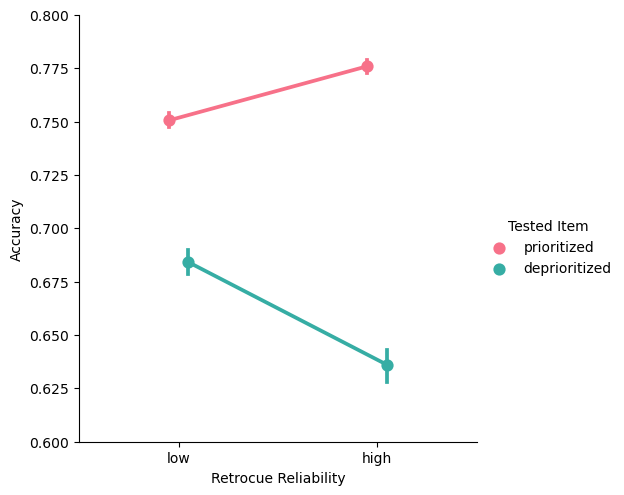

In [15]:

plt.figure(figsize=(10, 6))
sns.catplot(
    x='Retrocue Reliability',
    y='Accuracy',
    errorbar=('ci', 68),  # Updated error bar parameter
    order = ['low','high'],
#     col = 'participant',
    kind = 'point',
    hue='Tested Item',
    dodge=0.1,
    palette=palette[::-1],  # Use the single-color palette
    data=df
)
plt.ylim(0.6, 0.8)
plt.ylabel('Accuracy')
# plt.xlabel('V2 Distractor Similarity to Prioritized Item')
# plt.title('Accuracy by V2 Distractor Similarity')
plt.show()



# plt.figure(figsize=(10, 6))
# sns.lmplot(
#     x='Retrocue Reliability',
#     y='Accuracy',
# #    x_bins = 5,
# #     order = 2,
#     ci = 68,
# #     hue = 'it_prefers_test',
# #     x_ci = 68,
#     data=df
# )


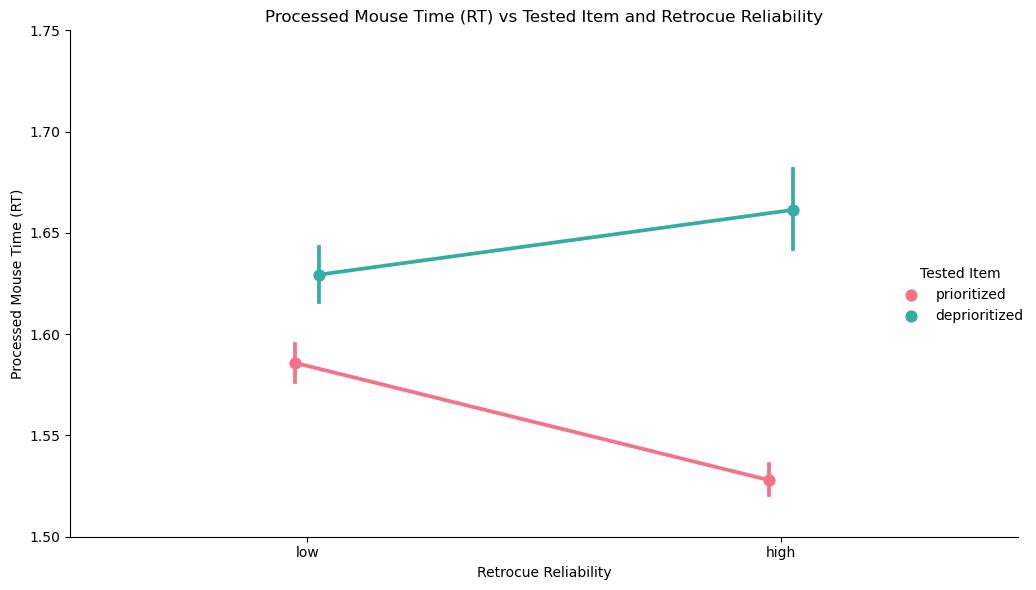

In [16]:
g = sns.catplot(x='Retrocue Reliability', y='analysis_rt', hue='Tested Item', 
            kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
            order=['low', 'high'],  # Specify the order of the categories
            palette = palette[::-1])
g.set(ylim=(1.5, 1.75))

plt.xlabel('Retrocue Reliability')
plt.ylabel('Processed Mouse Time (RT)')
plt.title('Processed Mouse Time (RT) vs Tested Item and Retrocue Reliability')
plt.tight_layout()
plt.show()

In [17]:
df['V2 Distractor Similarity\nto Tested Item']

19113                 
19114    Least Similar
19115    Least Similar
19116                 
19117                 
             ...      
30808                 
30809                 
30810     Most Similar
30811                 
30812     Most Similar
Name: V2 Distractor Similarity\nto Tested Item, Length: 42000, dtype: category
Categories (5, object): ['Least Similar' < '' < '  ' < '   ' < 'Most Similar']

In [18]:
# df['v2_sim_dis_test_sq_z']

In [19]:
df['V2 Distractor Similarity to Tested Item'] = df['v2_sim_dis_test_z']
df['IT Distractor Similarity to Tested Item'] = df['it_sim_dis_test_z']
df['Tested - Untested V2 Distractor Similarity'] = df['v2_sim_dis_diff_test_z']
df['Tested - Untested IT Distractor Similarity'] = df['it_sim_dis_diff_test_z']



In [20]:
# v2_sim_dis_test_z -  absolute
# v2_sim_dis_diff_test_z -relative

In [21]:
df['V2 Distractor Similarity\nto Prioritized Item'] = df['v2_sim_dis_attend_z']
df['IT Distractor Similarity\nto Prioritized Item'] = df['it_sim_dis_attend_z']
df['V2 Distractor Similarity\nto Deprioritized Item'] = df['v2_sim_dis_unattend_z']
df['IT Distractor Similarity\nto Deprioritized Item'] = df['it_sim_dis_unattend_z']

df['Prioritized - Deprioritized IT Distractor Similarity'] = df['it_sim_dis_diff_z'] 
df['Prioritized - Deprioritized V2 Distractor Similarity'] = df['v2_sim_dis_diff_z'] 

In [22]:
filtered_values = df[df['V2 Distractor Similarity to Tested Item'] > 0.10]
print(len(filtered_values))

17494


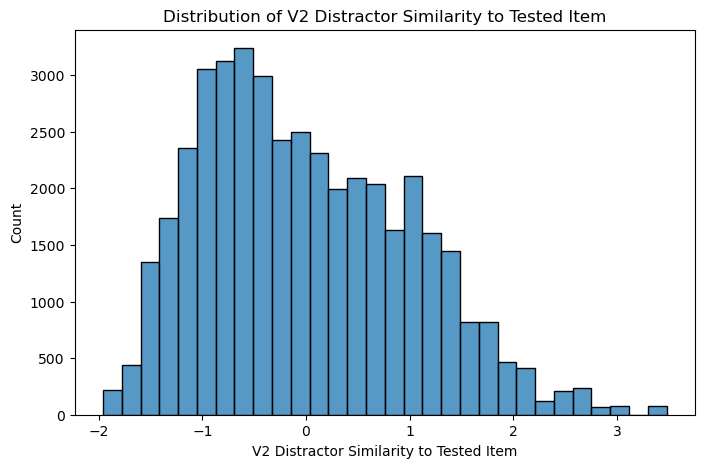

In [23]:
plt.figure(figsize=(8, 5))
sns.histplot(df['V2 Distractor Similarity to Tested Item'], bins=30)
plt.title('Distribution of V2 Distractor Similarity to Tested Item')
plt.show()


<Figure size 1000x600 with 0 Axes>

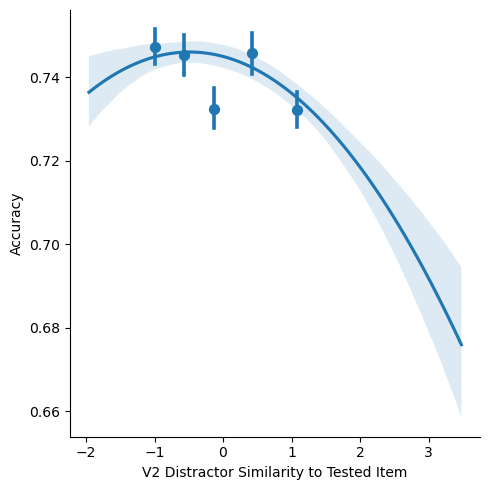

In [24]:
single_color = palette[0]  # Use the first color from the palette
single_color_palette = [single_color]

# plt.figure(figsize=(10, 6))
# sns.pointplot(
#     x='V2 Distractor Similarity\nto Tested Item',
#     y='Accuracy',
#     errorbar=('ci', 68),  # Updated error bar parameter
#     dodge=0.5,
#     palette=single_color_palette,  # Use the single-color palette
#     data=df
# )
# plt.ylim(0.7, 0.85)
# plt.ylabel('Accuracy')
# plt.xlabel('V2 Distractor Similarity to Tested Item')
# plt.title('Accuracy by V2 Distractor Similarity')
# plt.show()




plt.figure(figsize=(10, 6))
sns.lmplot(
    x='V2 Distractor Similarity to Tested Item',
    y='Accuracy',
    x_bins = 5,
    order = 2,
    ci = 68,
    data=df
)

In [25]:
df['validity_binary_z']

19113    0.577451
19114   -1.731749
19115   -1.731749
19116    0.577451
19117    0.577451
           ...   
30808   -1.731749
30809    0.577451
30810    0.577451
30811    0.577451
30812    0.577451
Name: validity_binary_z, Length: 42000, dtype: float64

In [26]:
df['tested_item']

19113      prioritized
19114    deprioritized
19115    deprioritized
19116      prioritized
19117      prioritized
             ...      
30808    deprioritized
30809      prioritized
30810      prioritized
30811      prioritized
30812      prioritized
Name: tested_item, Length: 42000, dtype: object

<Figure size 1000x600 with 0 Axes>

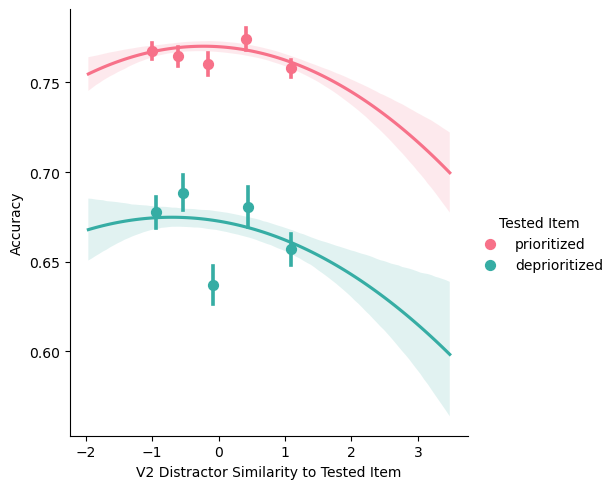

In [27]:
# g = sns.catplot(
#             x = 'V2 Distractor Similarity\nto Tested Item',
#             y = 'Accuracy',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.5,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = df)
# g.set(ylim=(0.55, 0.85))
# plt.ylabel('Accuracy')



plt.figure(figsize=(10, 6))
sns.lmplot(
    x='V2 Distractor Similarity to Tested Item',
    y='Accuracy',
    hue = 'Tested Item',
    x_bins = 5,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order

    data=df
)

In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='V2 Distractor Similarity to Tested Item',
    y='Accuracy',
    hue = 'Retrocue Reliability',
    x_bins = 5,
    order = 2,
    ci = 68,
    palette = palette,  # Reverse the color order

    data=df
)


In [ ]:
# g = sns.catplot(
#     x='V2 Distractor Similarity\nto Tested Item',
#     y='Accuracy',
#     ci=68,
#     hue='Tested Item',
#     row='Retrocue Reliability',  # Use 'row' instead of 'col' to arrange plots vertically
#     aspect=1.3,
#     dodge=0.5,
#     kind='point',
#     row_order = ['low', 'high'],
#     palette=palette[::-1],  # Reverse the color order
#     data=df
# )
# g.set(ylim=(0.50, 0.85))
# g.set_axis_labels("", "Accuracy")

# plt.show()


plt.figure(figsize=(10, 6))
sns.lmplot(
    x='V2 Distractor Similarity to Tested Item',
    y='Accuracy',
    hue='Tested Item',
    row_order = ['low', 'high'],
    row = 'Retrocue Reliability',
    x_bins = 5,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order

    data=df
)


In [ ]:
g = sns.catplot(x='V2 Distractor Similarity\nto Tested Item', y='analysis_rt', 
#                 hue='Tested Item', 
            kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
            # order=['Least Similar', ' ', ' ', ' ', 'Most Similar'],  # Specify the order of the categories
            palette = single_color_palette  # Reverse the color order
)
g.set(ylim=(1.5, 1.65))

plt.xlabel('V2 Distractor Similarity\nto Tested Item')
plt.ylabel('Processed Mouse Time (RT)')
plt.title('Processed Mouse Time (RT) vs V2 Distractor Similarity\nto Tested Item')
plt.tight_layout()
plt.show()

In [ ]:
g = sns.catplot(x='V2 Distractor Similarity\nto Tested Item', y='analysis_rt', 
                hue='Tested Item', 
            kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
            palette = palette[::-1]  # Reverse the color order
)
g.set(ylim=(1.5, 1.8))

plt.xlabel('V2 Distractor Similarity\nto Tested Item')
plt.ylabel('Processed Mouse Time (RT)')
plt.title('Processed Mouse Time (RT) vs V2 Distractor Similarity\nto Tested Item')
plt.tight_layout()
plt.show()

In [ ]:
g = sns.catplot(x='V2 Distractor Similarity\nto Tested Item', y='analysis_rt', 
                hue='Retrocue Reliability', 
            kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
            palette = palette  # Reverse the color order
)
g.set(ylim=(1.5, 1.7))

plt.xlabel('V2 Distractor Similarity\nto Tested Item')
plt.ylabel('Processed Mouse Time (RT)')
plt.title('Processed Mouse Time (RT) vs V2 Distractor Similarity\nto Tested Item')
plt.tight_layout()
plt.show()

In [ ]:
g = sns.catplot(x='V2 Distractor Similarity\nto Tested Item', y='analysis_rt', 
                hue='Tested Item', row='Retrocue Reliability',  # Use 'row' instead of 'col'
                kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
                palette=palette[::-1]  # Reverse the color order
)
g.set(ylim=(1.4, 1.9))

g.set_axis_labels('V2 Distractor Similarity\nto Tested Item', 'Processed Mouse Time (RT)')
plt.tight_layout()
plt.show()

In [ ]:


# plt.figure(figsize=(10, 6))
# sns.pointplot(
#     x='IT Distractor Similarity\nto Tested Item',
#     y='Accuracy',
#     errorbar=('ci', 68),  # Updated error bar parameter
#     dodge=0.5,
#     palette=single_color_palette,  # Use the single-color palette
#     data=df
# )
# plt.ylim(0.7, 0.85)
# plt.ylabel('Accuracy')
# plt.xlabel('IT Distractor Similarity to Tested Item')
# plt.title('Accuracy by IT Distractor Similarity')
# plt.show()


plt.figure(figsize=(10, 6))
sns.lmplot(
    x='IT Distractor Similarity to Tested Item',
    y='Accuracy',
    x_bins = 5,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df
)



In [ ]:

# plt.figure(figsize=(10, 6))
# sns.pointplot(
#     x='IT Distractor Similarity\nto Prioritized Item',
#     y='Tested Item',
#     errorbar=('ci', 68),  # Updated error bar parameter
#     dodge=0.5,
#     palette=single_color_palette,  # Use the single-color palette
#     data=df
# )
# plt.ylim(0.7, 0.85)
# plt.ylabel('Accuracy')
# plt.xlabel('IT Distractor Similarity to Prioritized Item')
# plt.title('Accuracy by IT Distractor Similarity')
# plt.show()



# g = sns.catplot(
#     x='V2 Distractor Similarity\nto Tested Item',
#     y='reliability_binary',
#     ci=68,
# #     hue='Tested Item',
# #     row='Retrocue Reliability',  # Use 'row' instead of 'col' to arrange plots vertically
#     aspect=1.3,
#     dodge=0.5,
#     kind='point',
#     row_order = ['low', 'high'],
# #     palette=palette,  # Reverse the color order
#     data=df)


# plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='IT Distractor Similarity to Tested Item',
    y='Accuracy',
    hue = 'Tested Item',
    x_bins = 5,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df
)


In [ ]:
# g = sns.catplot(
#             x = 'IT Distractor Similarity\nto Tested Item',
#             y = 'Accuracy',
#             ci = 68,
#             hue = 'Tested Item',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.5,
#             kind = 'point',
#             palette = palette[::-1],  # Reverse the color order
#             data = df)
# g.set(ylim=(0.55, 0.85))
# plt.ylabel('Accuracy')

In [ ]:
# g = sns.catplot(
#             x = 'IT Distractor Similarity\nto Tested Item',
#             y = 'Accuracy',
#             ci = 68,
#             hue = 'Retrocue Reliability',
#             # col = 'Retrocue Reliability',
#             aspect = 1.3,
#             dodge = 0.5,
#             kind = 'point',
#             palette = palette,  # Reverse the color order
#             data = df)
# g.set(ylim=(0.55, 0.85))
# plt.ylabel('Accuracy')


plt.figure(figsize=(10, 6))
sns.lmplot(
    x='IT Distractor Similarity to Tested Item',
    y='Accuracy',
    hue = 'Retrocue Reliability',
    x_bins = 5,
    order = 2,
    ci = 68,
    palette = palette,  # Reverse the color order
    data=df
)


In [ ]:
# g = sns.catplot(
#     x='IT Distractor Similarity\nto Tested Item',
#     y='Accuracy',
#     ci=68,
#     hue='Tested Item',
    
#     row='Retrocue Reliability',  # Use 'row' instead of 'col' to arrange plots vertically
#     aspect=1.3,
#     row_order = ['low', 'high'],
#     dodge=0.5,
#     kind='point',
#     palette=palette[::-1],  # Reverse the color order
#     data=df
# )
# g.set(ylim=(0.5, 0.85))
# g.set_axis_labels("", "Accuracy")

# plt.show()


plt.figure(figsize=(10, 6))
sns.lmplot(
    x='IT Distractor Similarity to Tested Item',
    y='Accuracy',
    hue='Tested Item',
    row_order = ['low', 'high'],
    row='Retrocue Reliability',  
    x_bins = 5,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df
)


In [ ]:
g = sns.catplot(x='IT Distractor Similarity\nto Tested Item', y='analysis_rt', 
#                 hue='Tested Item', 
            kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
            # order=['Least Similar', ' ', ' ', ' ', 'Most Similar'],  # Specify the order of the categories
            palette = single_color_palette  # Reverse the color order
)
g.set(ylim=(1.5, 1.7))

plt.xlabel('IT Distractor Similarity\nto Tested Item')
plt.ylabel('Processed Mouse Time (RT)')
plt.title('Processed Mouse Time (RT) vs IT Distractor Similarity\nto Tested Item')
plt.tight_layout()
plt.show()

In [ ]:
df['IT Distractor Similarity\nto Tested Item']

In [ ]:
g = sns.catplot(x='IT Distractor Similarity\nto Tested Item', y='analysis_rt', 
                hue='Tested Item', 
            kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
            palette = palette[::-1]  # Reverse the color order
)
g.set(ylim=(1.3, 1.8))

plt.xlabel('IT Distractor Similarity\nto Tested Item')
plt.ylabel('Processed Mouse Time (RT)')
plt.title('Processed Mouse Time (RT) vs IT Distractor Similarity\nto Tested Item')
plt.tight_layout()
plt.show()

In [ ]:
g = sns.catplot(x='IT Distractor Similarity\nto Tested Item', y='analysis_rt', 
                hue='Retrocue Reliability', 
            kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
            palette = palette  # Reverse the color order
)
g.set(ylim=(1.5, 1.7))

plt.xlabel('IT Distractor Similarity\nto Tested Item')
plt.ylabel('Processed Mouse Time (RT)')
plt.title('Processed Mouse Time (RT) vs IT Distractor Similarity\nto Tested Item')
plt.tight_layout()
plt.show()

In [ ]:
g = sns.catplot(x='IT Distractor Similarity\nto Tested Item', y='analysis_rt', 
                hue='Tested Item', row='Retrocue Reliability',  # Use 'row' instead of 'col'
                kind='point',row_order = ['low', 'high'], data=df_correct, dodge=True, height=6, aspect=1.5, 
                palette=palette[::-1]  # Reverse the color order
)
g.set(ylim=(1.4, 1.9))

g.set_axis_labels('IT Distractor Similarity\nto Tested Item', 'Processed Mouse Time (RT)')
plt.tight_layout()
plt.show()

In [ ]:
# df['IT_diff_binned'] = pd.qcut(df['it_sim_dis_diff'], 5, duplicates='drop')
# df['V2_diff_binned'] = pd.qcut(df['v2_sim_dis_diff'], 5, duplicates='drop')

# def round_to_significant_figures(x, sig_figs=2):
#     if x == 0:
#         return 0
#     else:
#         return round(x, sig_figs - int(np.floor(np.log10(abs(x)))) - 1)


# def process_interval(interval):
#     # Round both bounds
#     lower_rounded = round_to_significant_figures(interval.left)
#     upper_rounded = round_to_significant_figures(interval.right)
#     # Return a new interval with the rounded bounds
#     return pd.Interval(lower_rounded, upper_rounded)

# df['IT_diff_binned'] = df['IT_diff_binned'].apply(process_interval)
# df['V2_diff_binned'] = df['V2_diff_binned'].apply(process_interval)

# df['Prioritized - Deprioritized V2 Distractor Similarity Ranges'] = df['V2_diff_binned']
# df['Prioritized - Deprioritized IT Distractor Similarity Ranges'] = df['IT_diff_binned']

In [ ]:
# plt.figure(figsize=(10, 6))
# ax = sns.pointplot(
#     x='V2_diff_binned_test',
#     y='Accuracy',
# #     errorbar=('ci', 68),  # Updated error bar parameter
#     data=df
# )
# # sns.regplot(
# #     x='v2_sim_dis_diff',
# #     y='Accuracy',
# #     order = 2,
# #     ci = 68,
# #     errorbar=('ci', 68),  # Updated error bar parameter
# #     scatter = False,
# #     data=df,
# #     ax = ax,
# # )
# plt.ylim(0.7, 0.8)
# plt.ylabel('Accuracy')
# plt.xlabel('Tested - Untested V2 Distractor Similarity')
# plt.title('Accuracy by V2 Distractor Similarity')
# plt.show()

In [ ]:
# plt.figure(figsize=(10, 6))
# sns.relplot(
#     x='v2_sim_dis_diff_test',
#     y='Accuracy',
#     kind = 'line',
# #     errorbar=('ci', 68),  # Updated error bar parameter
#     palette=single_color_palette,  # Use the single-color palette
#     data=df
# )

In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Tested - Untested IT Distractor Similarity',
    y='Accuracy',
    x_bins = 5,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df
)


In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Tested - Untested IT Distractor Similarity',
    y='Accuracy',
    hue = 'Tested Item',
    x_bins = 5,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df
)

In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Tested - Untested IT Distractor Similarity',
    y='Accuracy',
    hue = 'Retrocue Reliability',
    x_bins = 5,
    order = 2,
    ci = 68,
    palette = palette,  # Reverse the color order
    data=df
)

In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Tested - Untested IT Distractor Similarity',
    y='Accuracy',
    row = 'Retrocue Reliability',
    row_order = ['low', 'high'],
    hue = 'Tested Item',
    x_bins = 5,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df
)


In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Tested - Untested V2 Distractor Similarity',
#     x='v2_sim_dis_diff_test_z',

    y='Accuracy',
    x_bins = 5,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df
)

In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Tested - Untested V2 Distractor Similarity',
    y='Accuracy',
    hue = 'Tested Item',
    x_bins = 5,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df
)

In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Tested - Untested V2 Distractor Similarity',
    y='Accuracy',
    hue = 'Retrocue Reliability',
    x_bins = 5,
    order = 2,
    ci = 68,
    palette = palette,  # Reverse the color order
    data=df
)

In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Tested - Untested IT Distractor Similarity',
    y='Accuracy',
    row = 'Retrocue Reliability',
    row_order = ['low', 'high'],
    hue = 'Tested Item',
    x_bins = 5,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df
)

In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='Tested - Untested V2 Distractor Similarity',
    y='Accuracy',
    row = 'Retrocue Reliability',
    row_order = ['low', 'high'],
    hue = 'Tested Item',
    x_bins = 5,
    order = 2,
    ci = 68,
    palette = palette[::-1],  # Reverse the color order
    data=df
)

In [ ]:
v2 = df.copy()
it = df.copy()
it['similarity'] = df['it_sim_dis_diff_test_z']
v2['similarity'] = df['v2_sim_dis_diff_test_z']
it['model'] = 'it'
v2['model'] = 'v2'
df_fig = pd.concat([it,
                   v2])
df_fig = df_fig[df_fig['Tested Item']  == 'prioritized']
sns.lmplot(
    x='similarity',
    y='Accuracy',
    col = 'model',
   x_bins = 6,
    order = 2,
    ci = 68,
    x_ci = 68,
    data=df_fig
)

In [ ]:
v2 = df.copy()
it = df.copy()
it['similarity'] = df['it_sim_dis_diff_test_z']
v2['similarity'] = df['v2_sim_dis_diff_test_z']
it['model'] = 'it'
v2['model'] = 'v2'
df_fig = pd.concat([it,
                   v2])
df_fig = df_fig[df_fig['Tested Item']  == 'prioritized']
sns.lmplot(
    x='similarity',
    y='Accuracy',
    col = 'model',
   x_bins = 5,
    order = 2,
    ci = 68,
    x_ci = 68,
    data=df_fig
)

In [ ]:
df['it_sim_dis_diff_test_z'] = scaler.fit_transform(df[['it_sim_dis_diff_test']])
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='it_sim_dis_diff_test_z',
    y='Accuracy',
   x_bins = 5,
    order = 2,
    ci = 68,
    hue = 'Tested Item',
    x_ci = 68,
    data=df
)
g.set(ylim=(0.65, 0.85))


In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='it_sim_dis_test',
    y='Accuracy',
   x_bins = 5,
    order = 2,
    ci = 68,
    hue = 'Tested Item',
    x_ci = 68,
    data=df
)
g.set(ylim=(0.65, 0.85))

In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='v2_sim_dis_test',
    y='Accuracy',
   x_bins = 5,
    order = 2,
    ci = 68,
    hue = 'Tested Item',
    x_ci = 68,
    data=df
)
g.set(ylim=(0.65, 0.85))

In [ ]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    x='v2_sim_dis_test_z',
    y='Accuracy',
   x_bins = 5,
    order = 2,
    ci = 68,
    hue = 'Tested Item',
    x_ci = 68,
    data=df
)
g.set(ylim=(0.65, 0.85))

In [ ]:
v2 = df.copy()
it = df.copy()
it['similarity'] = df['it_sim_dis_test_z']
v2['similarity'] = df['v2_sim_dis_test_z']
it['model'] = 'it'
v2['model'] = 'v2'
df_fig = pd.concat([it,
                   v2])
df_fig = df_fig[df_fig['Tested Item']  == 'prioritized']
sns.lmplot(
    x='similarity',
    y='Accuracy',
    col = 'model',
   x_bins = 5,
    order = 2,
    ci = 68,
    x_ci = 68,
    data=df_fig
)

In [ ]:
df['Tested - Untested V2 Distractor Similarity Ranges']

In [ ]:



g = sns.catplot(
            x = 'Tested - Untested V2 Distractor Similarity',
            y = 'Accuracy',
            ci = 68,
            hue = 'Retrocue Reliability',
            # col = 'Retrocue Reliability',
            aspect = 1.3,
#             dodge = 0.5,
            kind = 'point',
            
            palette = palette,  # Reverse the color order
            data = df)
g.set(ylim=(0.65, 0.85))
plt.xticks(rotation=45)


plt.ylabel('Accuracy')



/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_56471/3066009943.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


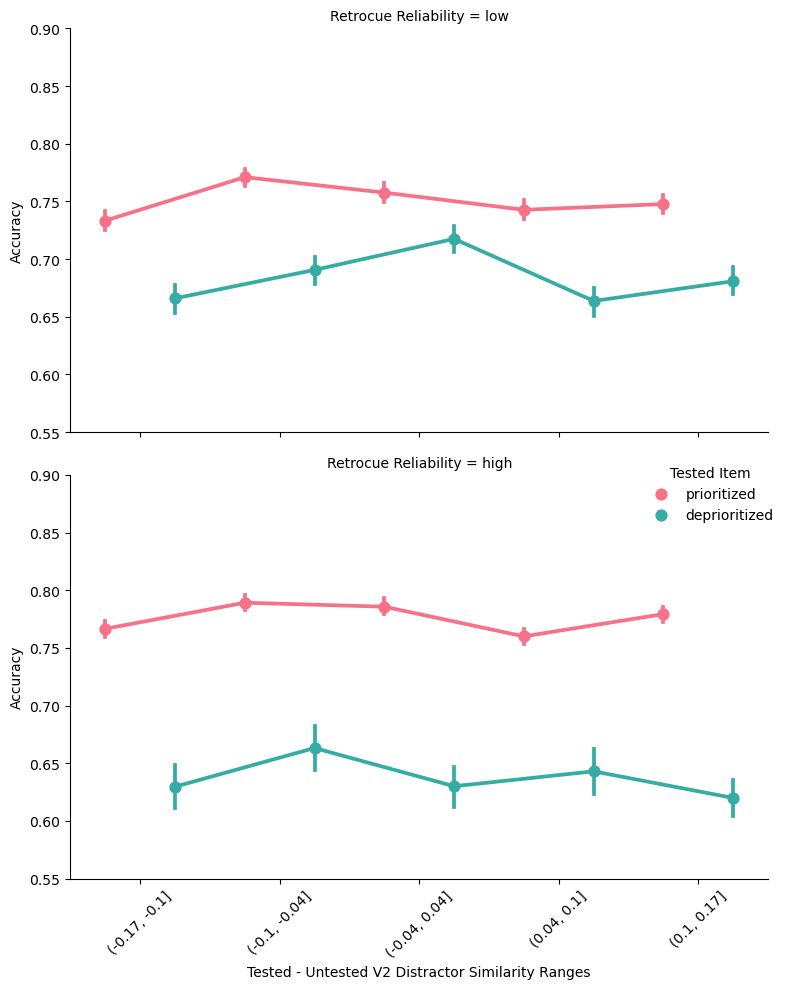

In [28]:


g = sns.catplot(
    x='Tested - Untested V2 Distractor Similarity Ranges',
    y='Accuracy',
    ci=68,
    hue='Tested Item',
    row='Retrocue Reliability',  # Use 'row' instead of 'col'
    aspect=1.3,
    row_order = ['low', 'high'],
    dodge=0.5,
    kind='point',
    palette=palette[::-1],  # Use the reversed color order
    data=df
)
g.set(ylim=(0.55, 0.9))

# Rotate the x-axis labels
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

g.set_axis_labels("Tested - Untested V2 Distractor Similarity Ranges", "Accuracy")
plt.tight_layout()
plt.show()

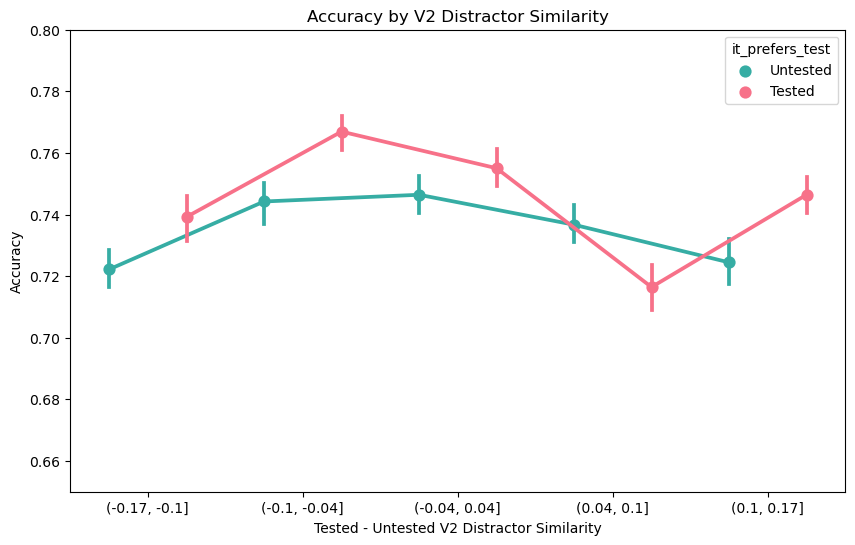

In [29]:
plt.figure(figsize=(10, 6))
sns.pointplot(
    x='V2_diff_binned_test',
    y='Accuracy',
    hue = 'it_prefers_test',
    errorbar=('ci', 68),  # Updated error bar parameter
    dodge=0.5,
    palette=palette,  # Use the single-color palette
    data=df
)
plt.ylim(0.65, 0.8)
plt.ylabel('Accuracy')
plt.xlabel('Tested - Untested V2 Distractor Similarity')
plt.title('Accuracy by V2 Distractor Similarity')
plt.show()

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_56471/4003700347.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(46.88246527777777, 0.5, 'Accuracy')

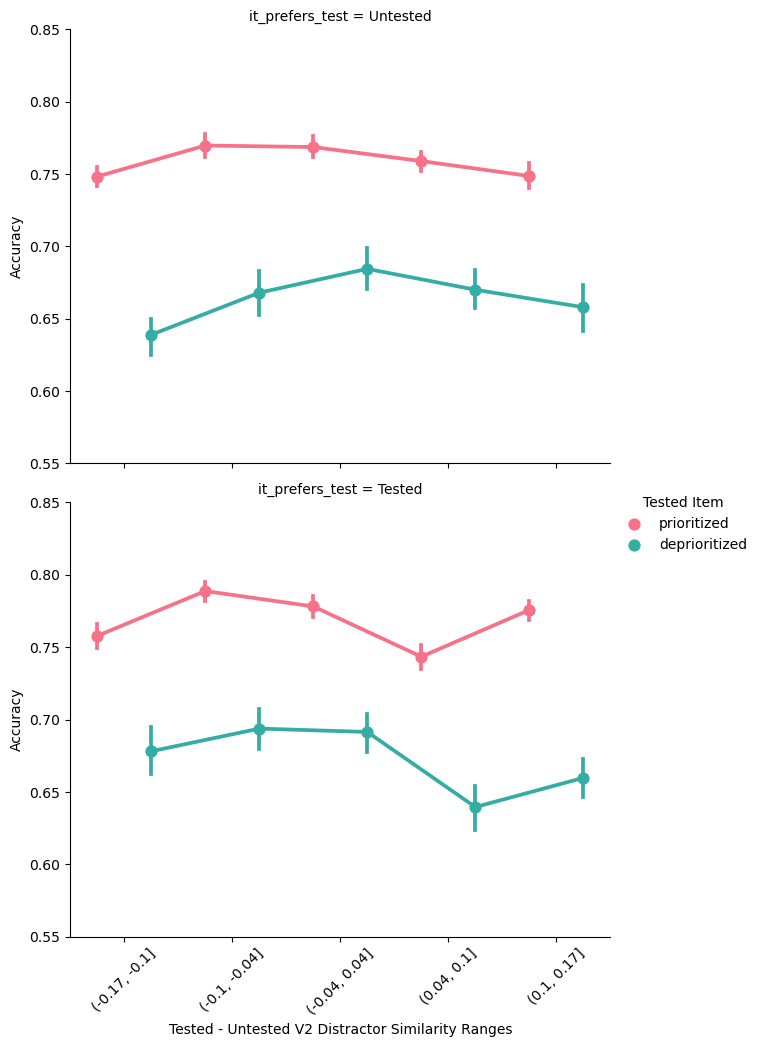

In [30]:
g = sns.catplot(
            x = 'Tested - Untested V2 Distractor Similarity Ranges',
            y = 'Accuracy',
            ci = 68,
            row = 'it_prefers_test',
            hue = 'Tested Item',
            # col = 'Retrocue Reliability',
            aspect = 1.3,
            dodge = 0.5,
            kind = 'point',
            
            palette = palette[::-1],  # Reverse the color order
            data = df)
g.set(ylim=(0.55, 0.85))
plt.xticks(rotation=45)

plt.ylabel('Accuracy')

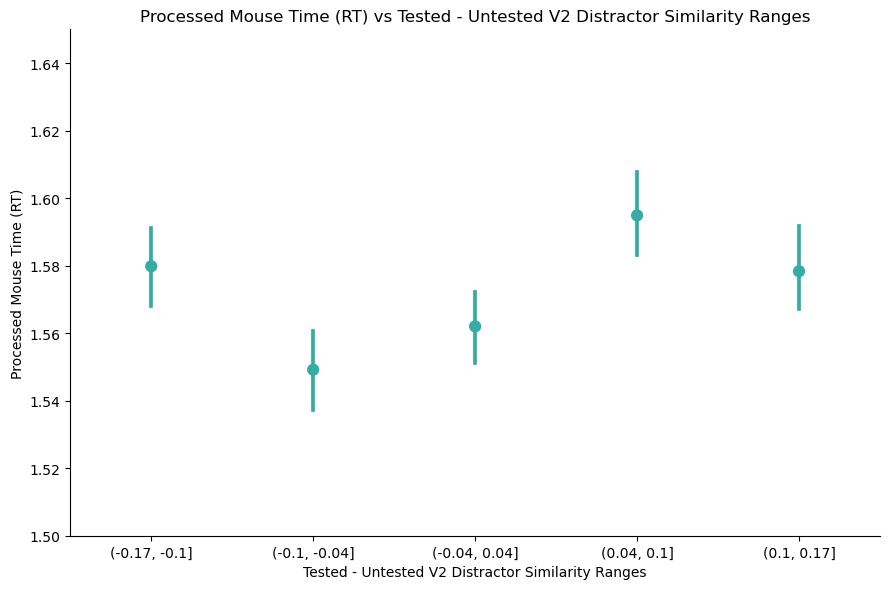

In [31]:
g = sns.catplot(x='Tested - Untested V2 Distractor Similarity Ranges', y='analysis_rt', 
#                 hue='Tested Item', 
            kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
            # order=['Least Similar', ' ', ' ', ' ', 'Most Similar'],  # Specify the order of the categories
            palette = single_color_palette  # Reverse the color order
)
g.set(ylim=(1.5, 1.65))

plt.xlabel('Tested - Untested V2 Distractor Similarity Ranges')
plt.ylabel('Processed Mouse Time (RT)')
plt.title('Processed Mouse Time (RT) vs Tested - Untested V2 Distractor Similarity Ranges')
plt.tight_layout()
plt.show()

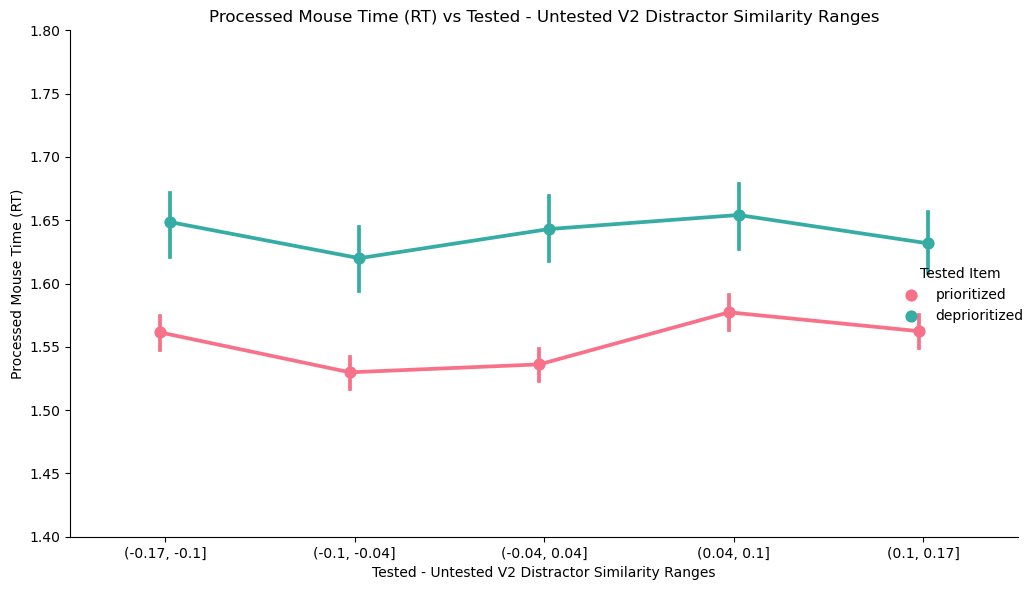

In [32]:
g = sns.catplot(x='Tested - Untested V2 Distractor Similarity Ranges', y='analysis_rt', 
                hue='Tested Item', 
            kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
            palette = palette[::-1]  # Reverse the color order
)
g.set(ylim=(1.4, 1.8))

plt.xlabel('Tested - Untested V2 Distractor Similarity Ranges')
plt.ylabel('Processed Mouse Time (RT)')
plt.title('Processed Mouse Time (RT) vs Tested - Untested V2 Distractor Similarity Ranges')
plt.tight_layout()
plt.show()

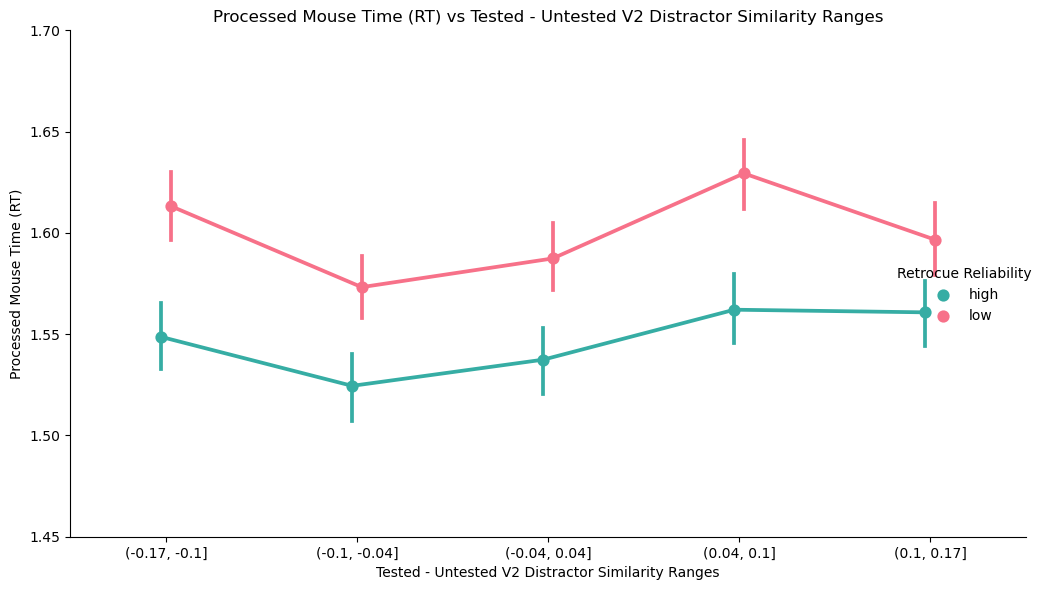

In [33]:
g = sns.catplot(x='Tested - Untested V2 Distractor Similarity Ranges', y='analysis_rt', 
                hue='Retrocue Reliability', 
            kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
            palette = palette  # Reverse the color order
)
g.set(ylim=(1.45, 1.7))

plt.xlabel('Tested - Untested V2 Distractor Similarity Ranges')
plt.ylabel('Processed Mouse Time (RT)')
plt.title('Processed Mouse Time (RT) vs Tested - Untested V2 Distractor Similarity Ranges')
plt.tight_layout()
plt.show()

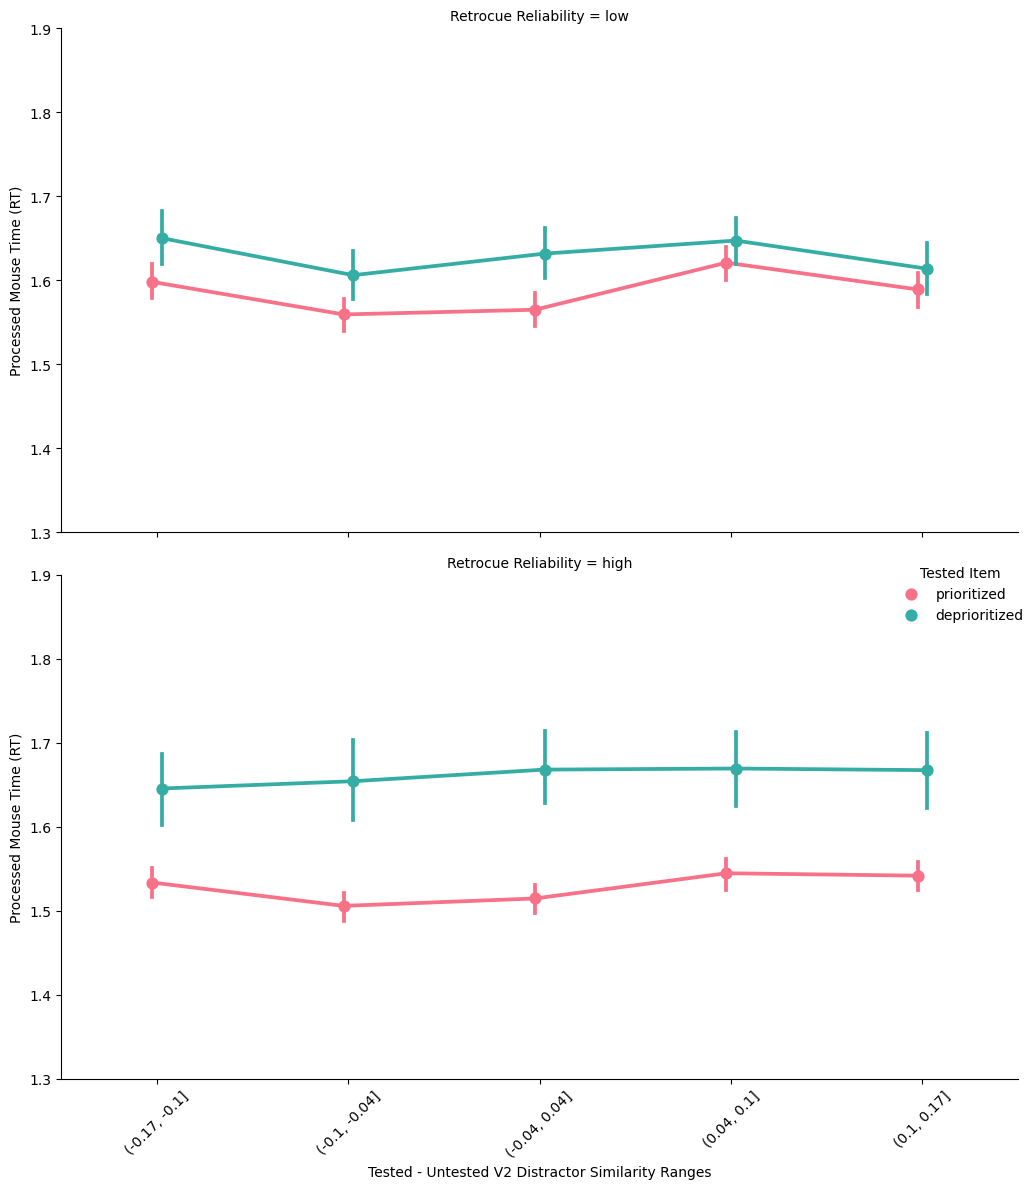

In [34]:
g = sns.catplot(
    x='Tested - Untested V2 Distractor Similarity Ranges',
    y='analysis_rt',
    row='Retrocue Reliability',
    hue='Tested Item',  # Use 'row' instead of 'col'
    kind='point',
    row_order = ['low', 'high'],
    data=df_correct,
    dodge=True,
    height=6,
    aspect=1.5,
    palette=palette[::-1]  # Use the reversed color order
)
g.set(ylim=(1.3, 1.9))

# Rotate the x-axis labels
for ax in g.axes.flat:
    ax.set_xlabel('Tested - Untested V2 Distractor Similarity Ranges')
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Set the y-axis label for all plots
g.set_axis_labels('Tested - Untested V2 Distractor Similarity Ranges', 'Processed Mouse Time (RT)')

plt.tight_layout()
plt.show()

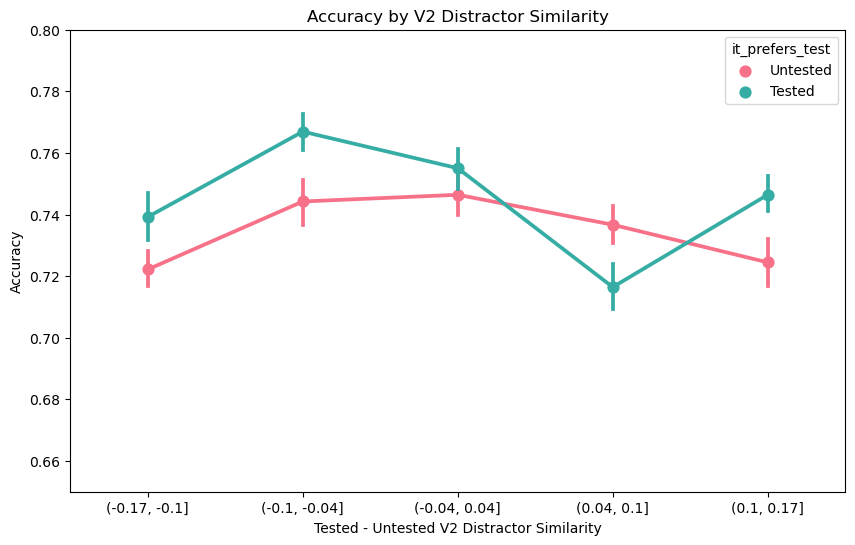

In [35]:
plt.figure(figsize=(10, 6))
sns.pointplot(
    x='V2_diff_binned_test',
    y='Accuracy',
    hue = 'it_prefers_test',
    errorbar=('ci', 68),  # Updated error bar parameter
#     dodge=0.5,
    palette=palette[::-1],  # Use the single-color palette
    data=df
)
plt.ylim(0.65, 0.8)
plt.ylabel('Accuracy')
plt.xlabel('Tested - Untested V2 Distractor Similarity')
plt.title('Accuracy by V2 Distractor Similarity')
plt.show()

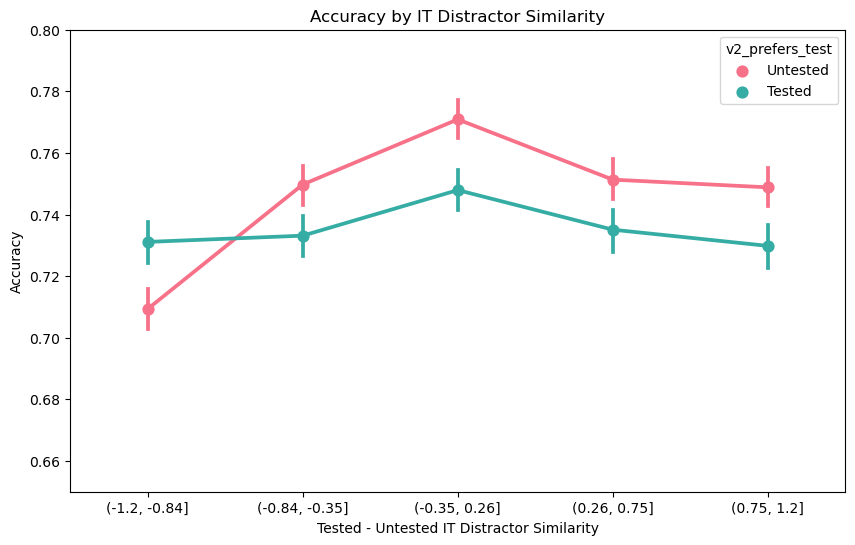

In [36]:
plt.figure(figsize=(10, 6))
sns.pointplot(
    x='IT_diff_binned_test',
    y='Accuracy',
    hue = 'v2_prefers_test',
    errorbar=('ci', 68),  # Updated error bar parameter
#     dodge=0.5,
    palette=palette[::-1],  # Use the single-color palette
    data=df
)
plt.ylim(0.65, 0.8)
plt.ylabel('Accuracy')
plt.xlabel('Tested - Untested IT Distractor Similarity')
plt.title('Accuracy by IT Distractor Similarity')
plt.show()

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_56471/1989802417.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(0.5694444444444517, 0.5, 'Accuracy')

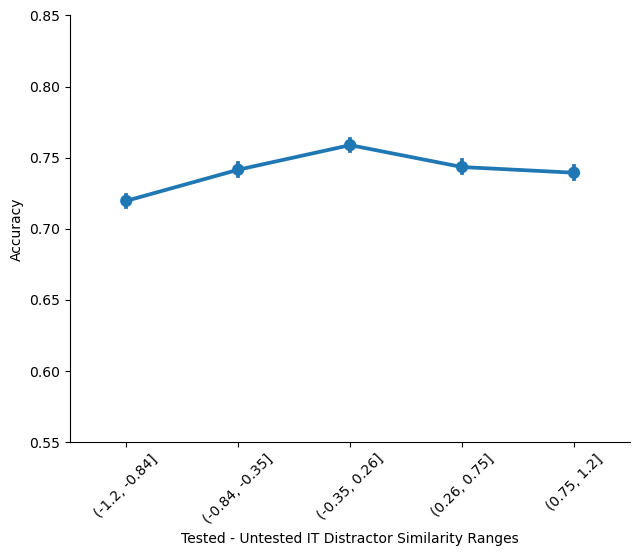

In [37]:
g = sns.catplot(
            x = 'Tested - Untested IT Distractor Similarity Ranges',
            y = 'Accuracy',
            ci = 68,
#             row = 'v2_prefers_test',
#             hue = 'Tested Item',
            # col = 'Retrocue Reliability',
            aspect = 1.3,
            dodge = 0.5,
            kind = 'point',
            
#             palette = palette[::-1],  # Reverse the color order
            data = df)
g.set(ylim=(0.55, 0.85))
plt.xticks(rotation=45)

plt.ylabel('Accuracy')

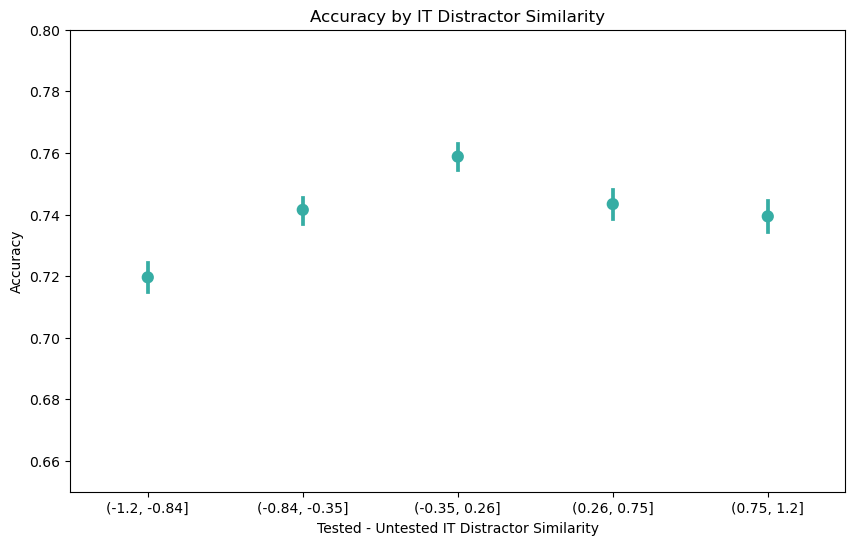

In [38]:
plt.figure(figsize=(10, 6))
sns.pointplot(
    x='IT_diff_binned_test',
    y='Accuracy',
    errorbar=('ci', 68),  # Updated error bar parameter
    dodge=0.5,
    palette=single_color_palette,  # Use the single-color palette
    data=df
)
plt.ylim(0.65, 0.8)
plt.ylabel('Accuracy')
plt.xlabel('Tested - Untested IT Distractor Similarity')
plt.title('Accuracy by IT Distractor Similarity')
plt.show()

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_56471/2359488545.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(44.99652777777777, 0.5, 'Accuracy')

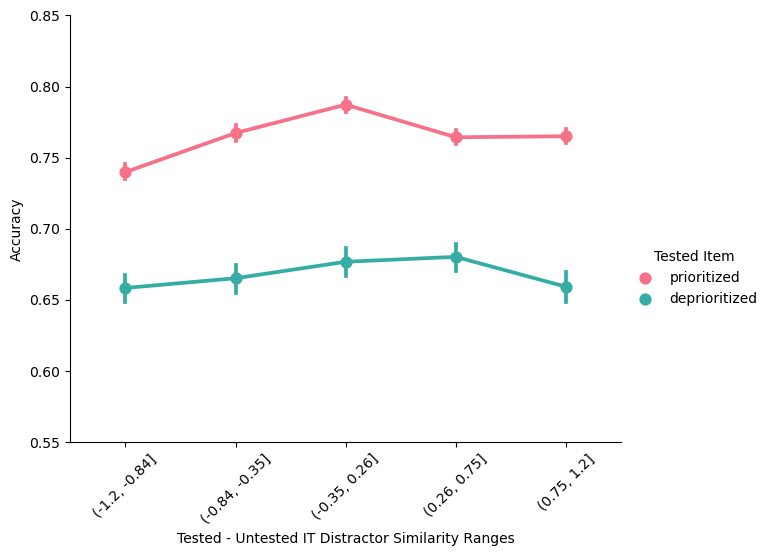

In [39]:
g = sns.catplot(
            x = 'Tested - Untested IT Distractor Similarity Ranges',
            y = 'Accuracy',
            ci = 68,
#             row = 'v2_prefers',
            hue = 'Tested Item',
            # col = 'Retrocue Reliability',
            aspect = 1.3,
#             dodge = 0.5,
            kind = 'point',
            
            palette = palette[::-1],  # Reverse the color order
            data = df)
g.set(ylim=(0.55, 0.85))
plt.xticks(rotation=45)

plt.ylabel('Accuracy')

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_56471/277507804.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(45.877985517568845, 0.5, 'Accuracy')

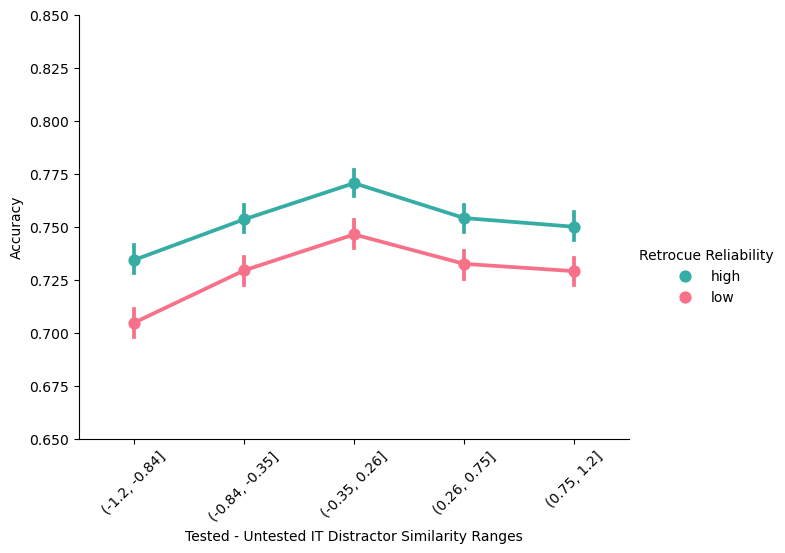

In [40]:
g = sns.catplot(
            x = 'Tested - Untested IT Distractor Similarity Ranges',
            y = 'Accuracy',
            ci = 68,
            hue = 'Retrocue Reliability',
            # col = 'Retrocue Reliability',
            aspect = 1.3,
#             dodge = 0.5,
            kind = 'point',
            
            palette = palette,  # Reverse the color order
            data = df)
g.set(ylim=(0.65, 0.85))
plt.xticks(rotation=45)

plt.ylabel('Accuracy')

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_56471/3955138271.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


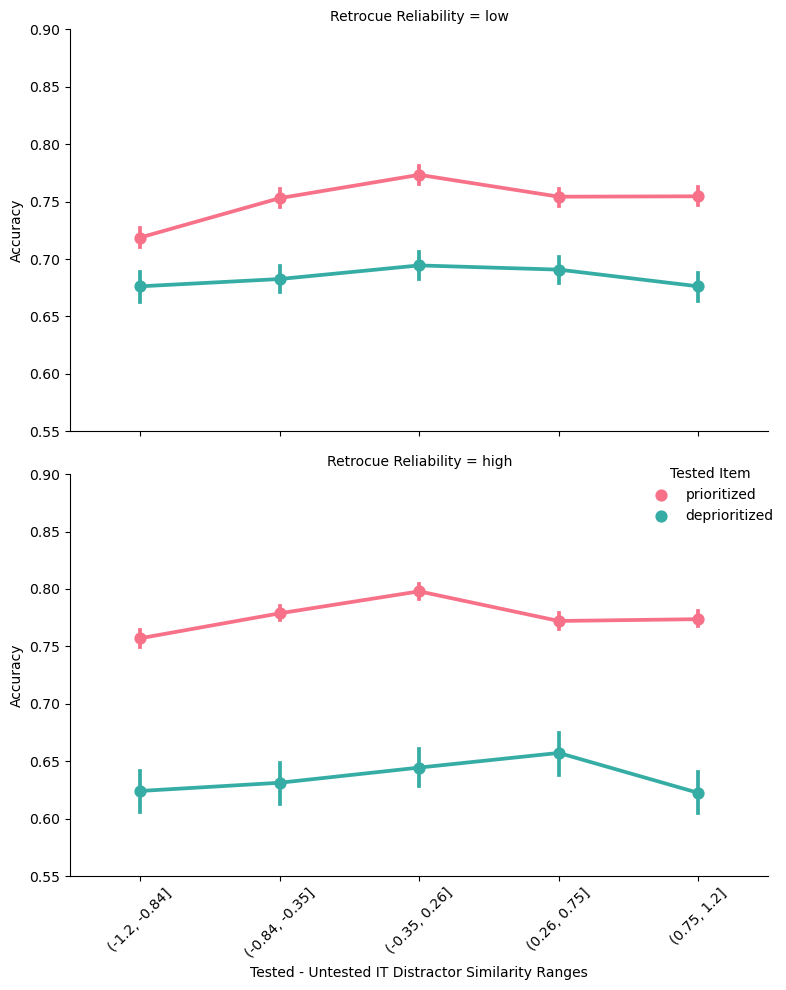

In [41]:


g = sns.catplot(
    x='Tested - Untested IT Distractor Similarity Ranges',
    y='Accuracy',
    ci=68,
    hue='Tested Item',
    row='Retrocue Reliability',  # Use 'row' instead of 'col'
    aspect=1.3,
    row_order = ['low', 'high'],
#     dodge=0.5,
    kind='point',
    palette=palette[::-1],  # Use the reversed color order
    data=df
)
g.set(ylim=(0.55, 0.9))

# Rotate the x-axis labels
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

g.set_axis_labels("Tested - Untested IT Distractor Similarity Ranges", "Accuracy")
plt.tight_layout()
plt.show()

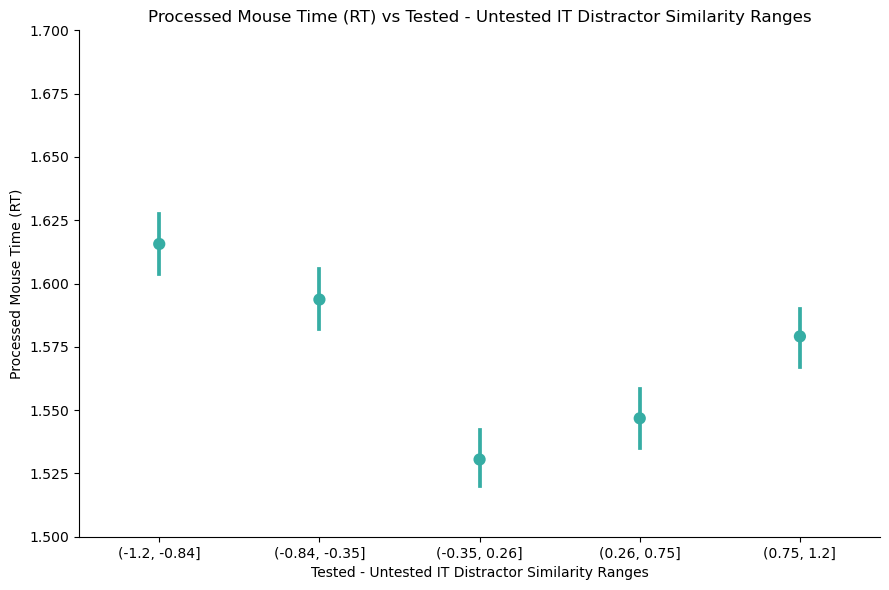

In [42]:
g = sns.catplot(x='Tested - Untested IT Distractor Similarity Ranges', y='analysis_rt', 
#                 hue='Tested Item', 
            kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
            # order=['Least Similar', ' ', ' ', ' ', 'Most Similar'],  # Specify the order of the categories
            palette = single_color_palette  # Reverse the color order
)
g.set(ylim=(1.5, 1.7))

plt.xlabel('Tested - Untested IT Distractor Similarity Ranges')
plt.ylabel('Processed Mouse Time (RT)')
plt.title('Processed Mouse Time (RT) vs Tested - Untested IT Distractor Similarity Ranges')
plt.tight_layout()
plt.show()

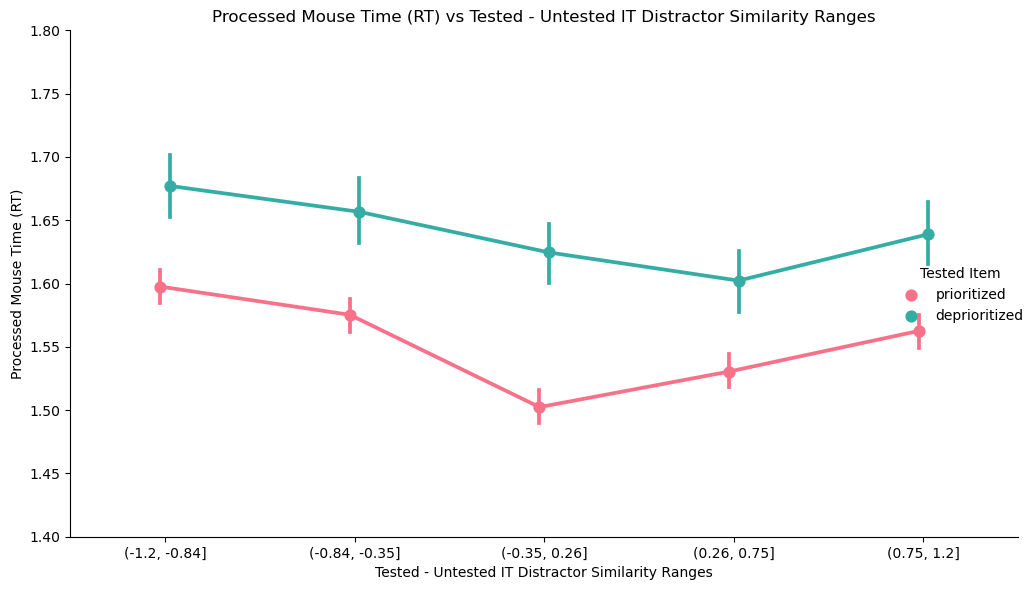

In [43]:
g = sns.catplot(x='Tested - Untested IT Distractor Similarity Ranges', y='analysis_rt', 
                hue='Tested Item', 
            kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
            palette = palette[::-1]  # Reverse the color order
)
g.set(ylim=(1.4, 1.8))

plt.xlabel('Tested - Untested IT Distractor Similarity Ranges')
plt.ylabel('Processed Mouse Time (RT)')
plt.title('Processed Mouse Time (RT) vs Tested - Untested IT Distractor Similarity Ranges')
plt.tight_layout()
plt.show()

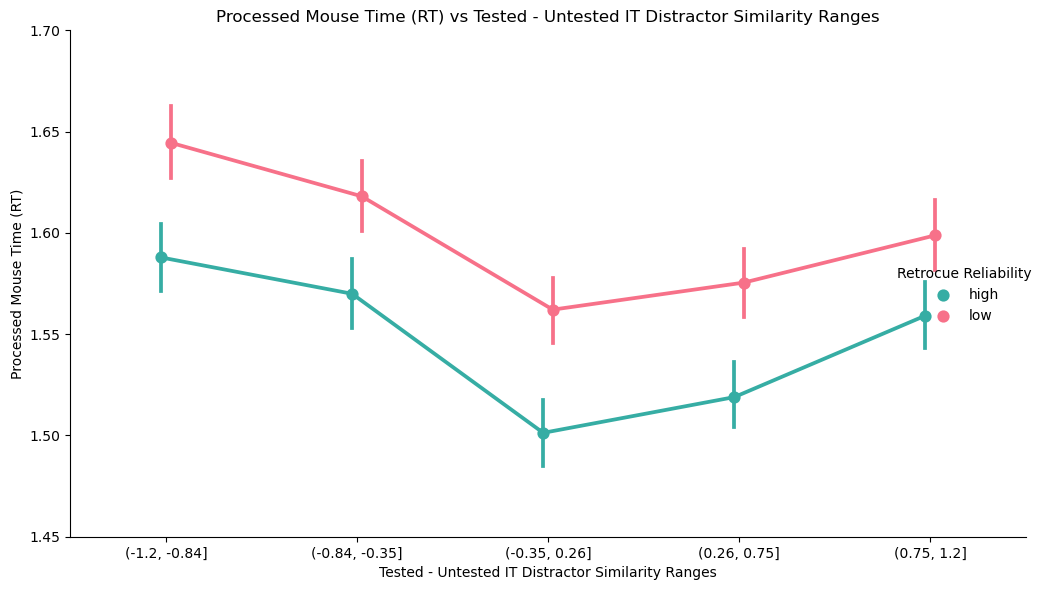

In [44]:
g = sns.catplot(x='Tested - Untested IT Distractor Similarity Ranges', y='analysis_rt', 
                hue='Retrocue Reliability', 
            kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
            palette = palette  # Reverse the color order
)
g.set(ylim=(1.45, 1.7))

plt.xlabel('Tested - Untested IT Distractor Similarity Ranges')
plt.ylabel('Processed Mouse Time (RT)')
plt.title('Processed Mouse Time (RT) vs Tested - Untested IT Distractor Similarity Ranges')
plt.tight_layout()
plt.show()

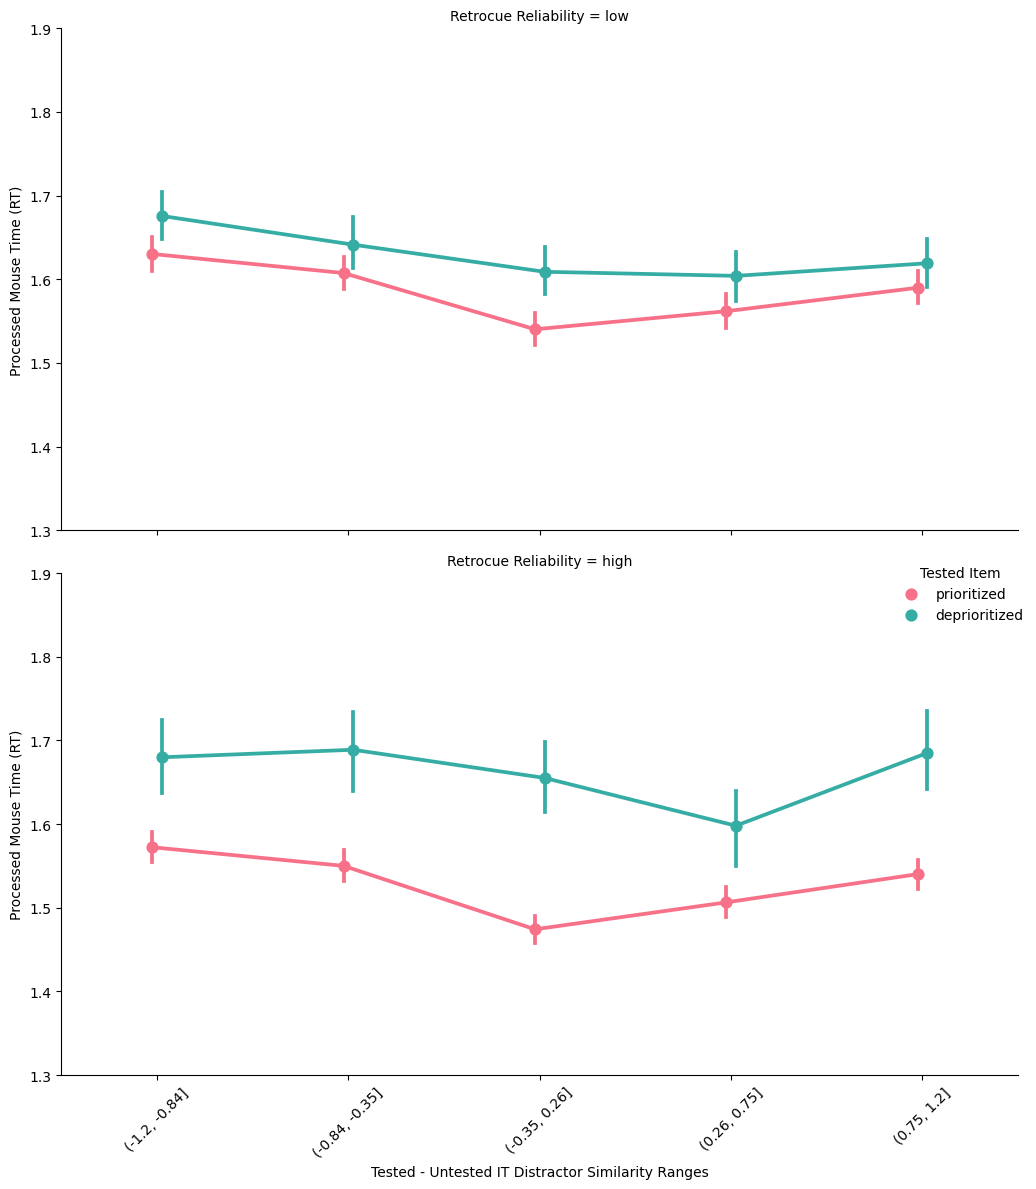

In [45]:
g = sns.catplot(
    x='Tested - Untested IT Distractor Similarity Ranges',
    y='analysis_rt',
    row='Retrocue Reliability',
    hue='Tested Item',  # Use 'row' instead of 'col'
    kind='point',
    row_order = ['low', 'high'],
    data=df_correct,
    dodge=True,
    height=6,
    aspect=1.5,
    palette=palette[::-1] # Use the reversed color order
)
g.set(ylim=(1.3, 1.9))

# Rotate the x-axis labels
for ax in g.axes.flat:
    ax.set_xlabel('Tested - Untested IT Distractor Similarity Ranges')
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Set the y-axis label for all plots
g.set_axis_labels('Tested - Untested IT Distractor Similarity Ranges', 'Processed Mouse Time (RT)')

plt.tight_layout()
plt.show()

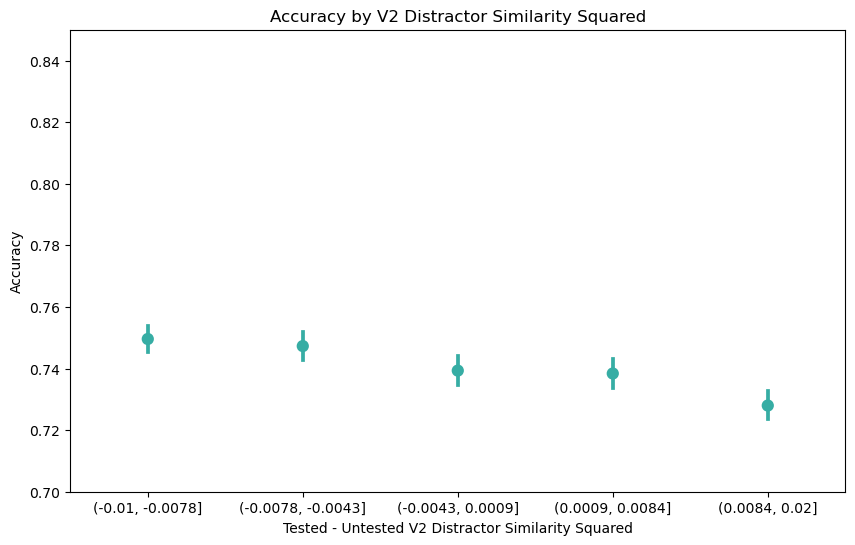

In [46]:
plt.figure(figsize=(10, 6))
sns.pointplot(
    x='V2_diff_binned_test_sq',
    y='Accuracy',
    errorbar=('ci', 68),  # Updated error bar parameter
    dodge=0.5,
    palette=single_color_palette,  # Use the single-color palette
    data=df
)
plt.ylim(0.7, 0.85)
plt.ylabel('Accuracy')
plt.xlabel('Tested - Untested V2 Distractor Similarity Squared')
plt.title('Accuracy by V2 Distractor Similarity Squared')
plt.show()




/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_56471/1705917288.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(44.99652777777777, 0.5, 'Accuracy')

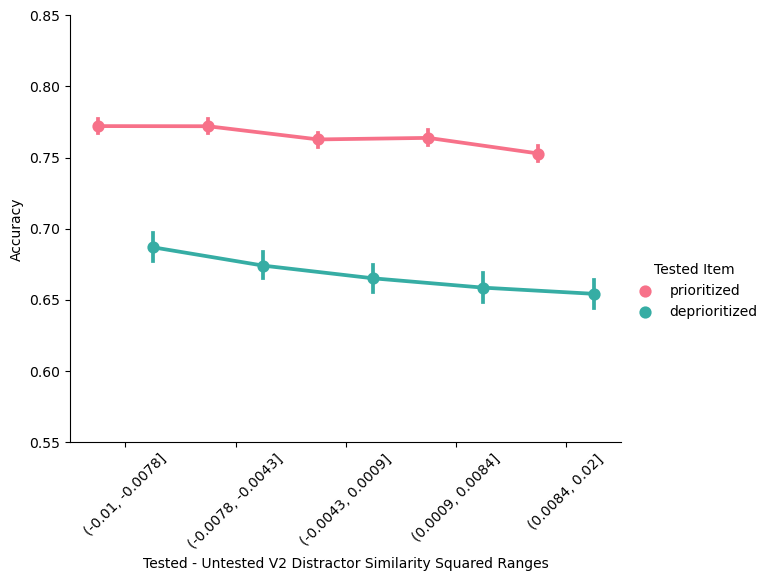

In [47]:

g = sns.catplot(
            x = 'Tested - Untested V2 Distractor Similarity Squared Ranges',
            y = 'Accuracy',
            ci = 68,
            hue = 'Tested Item',
            # col = 'Retrocue Reliability',
            aspect = 1.3,
            dodge = 0.5,
            kind = 'point',
            
            palette = sns.color_palette("husl", n_colors=2),  # Reverse the color order
            data = df)
g.set(ylim=(0.55, 0.85))
plt.xticks(rotation=45)

plt.ylabel('Accuracy')



/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_56471/2543625092.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(45.877985517568845, 0.5, 'Accuracy')

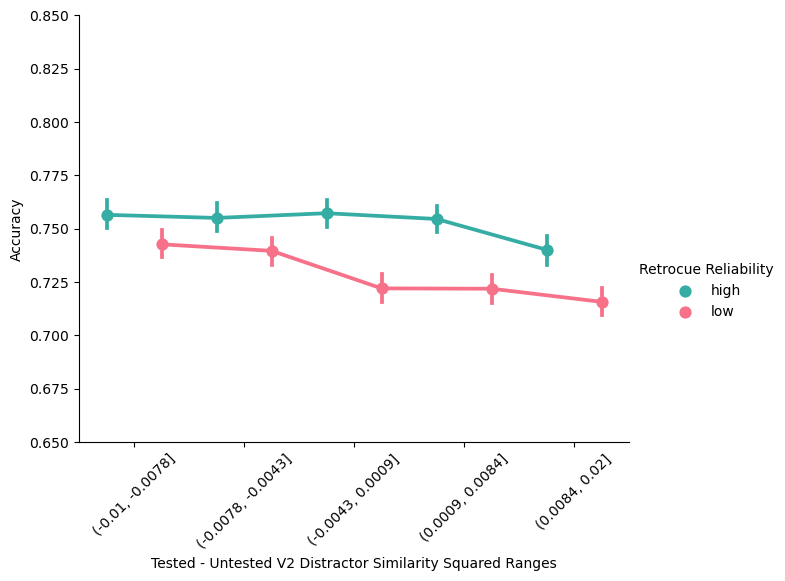

In [48]:

g = sns.catplot(
            x = 'Tested - Untested V2 Distractor Similarity Squared Ranges',
            y = 'Accuracy',
            ci = 68,
            hue = 'Retrocue Reliability',
            # col = 'Retrocue Reliability',
            aspect = 1.3,
            dodge = 0.5,
            kind = 'point',
            
            palette = palette,  # Reverse the color order
            data = df)
g.set(ylim=(0.65, 0.85))
plt.xticks(rotation=45)

plt.ylabel('Accuracy')


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_56471/3860848634.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


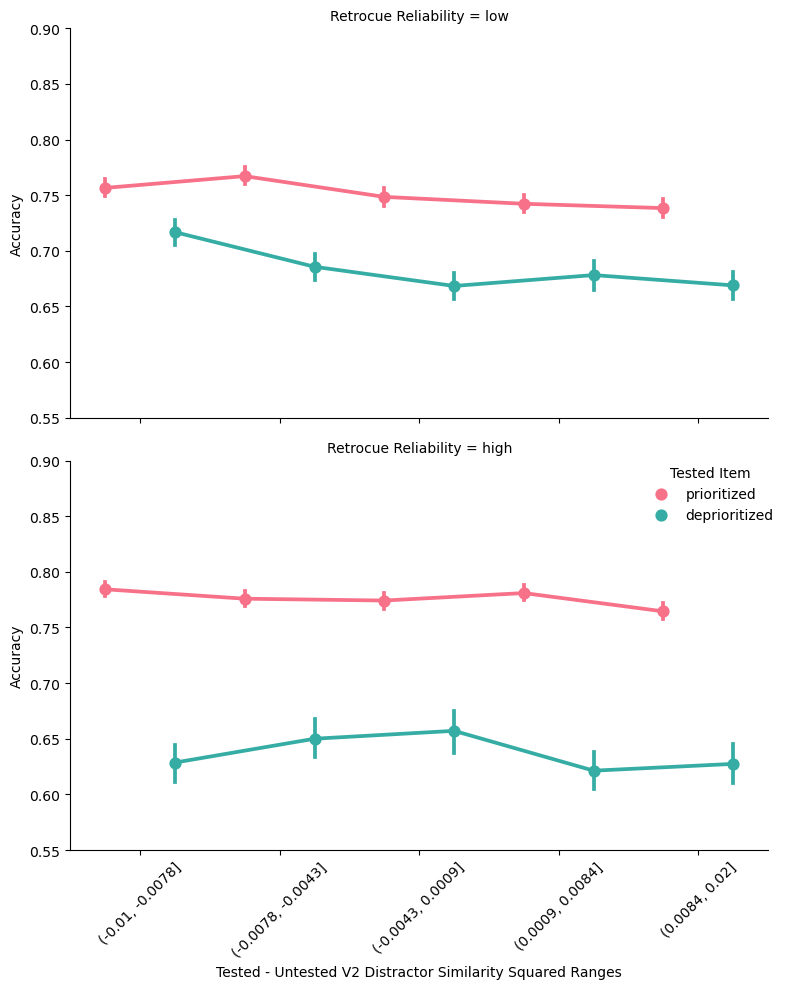

In [49]:


g = sns.catplot(
    x='Tested - Untested V2 Distractor Similarity Squared Ranges',
    y='Accuracy',
    ci=68,
    hue='Tested Item',
    row='Retrocue Reliability',  # Use 'row' instead of 'col'
    aspect=1.3,
    row_order = ['low', 'high'],
    dodge=0.5,
    kind='point',
    palette=palette[::-1],  # Use the reversed color order
    data=df
)
g.set(ylim=(0.55, 0.9))

# Rotate the x-axis labels
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

g.set_axis_labels("Tested - Untested V2 Distractor Similarity Squared Ranges", "Accuracy")
plt.tight_layout()
plt.show()

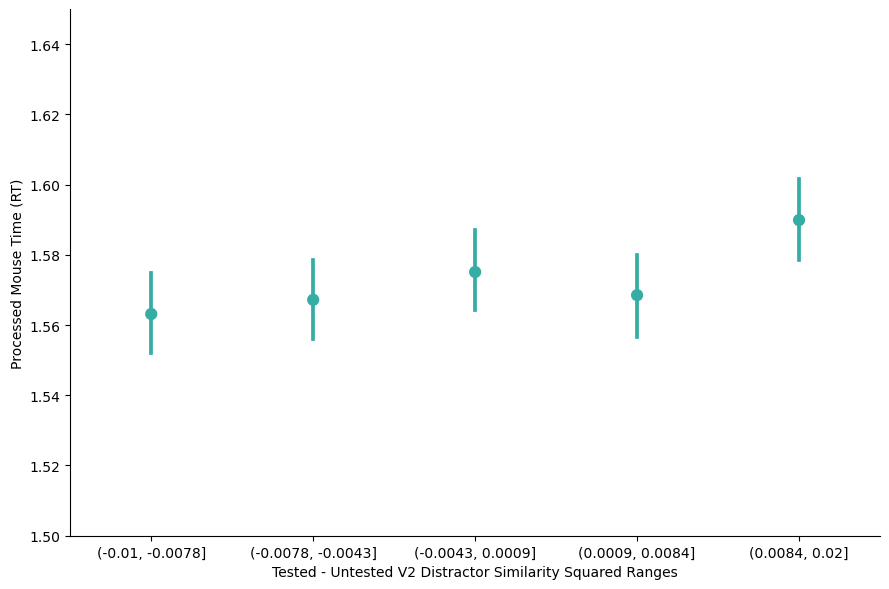

In [50]:
g = sns.catplot(x='Tested - Untested V2 Distractor Similarity Squared Ranges', y='analysis_rt', 
#                 hue='Tested Item', 
            kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
            # order=['Least Similar', ' ', ' ', ' ', 'Most Similar'],  # Specify the order of the categories
            palette = single_color_palette  # Reverse the color order
)
g.set(ylim=(1.5, 1.65))

plt.xlabel('Tested - Untested V2 Distractor Similarity Squared Ranges')
plt.ylabel('Processed Mouse Time (RT)')
# plt.title('Processed Mouse Time (RT) vs V2 Distractor Similarity\nSquared Ranges')
plt.tight_layout()
plt.show()



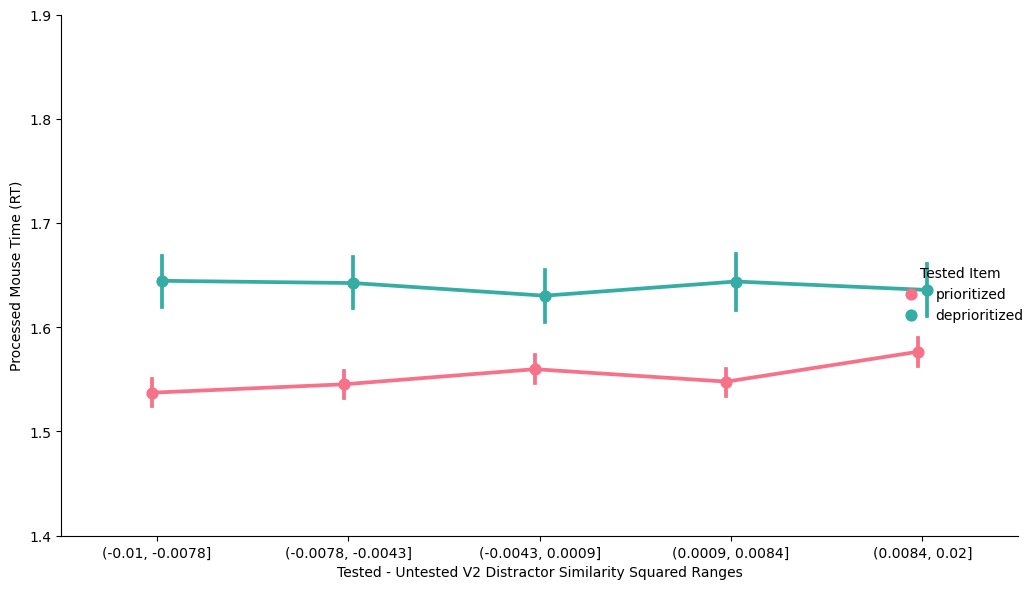

In [51]:
g = sns.catplot(x='Tested - Untested V2 Distractor Similarity Squared Ranges', y='analysis_rt', 
                hue='Tested Item', 
            kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
            palette = palette[::-1]  # Reverse the color order
)
g.set(ylim=(1.4, 1.9))

plt.xlabel('Tested - Untested V2 Distractor Similarity Squared Ranges')
plt.ylabel('Processed Mouse Time (RT)')
# plt.title('Processed Mouse Time (RT) vs V2 Distractor Similarity\nto Prioritized Item')
plt.tight_layout()
plt.show()



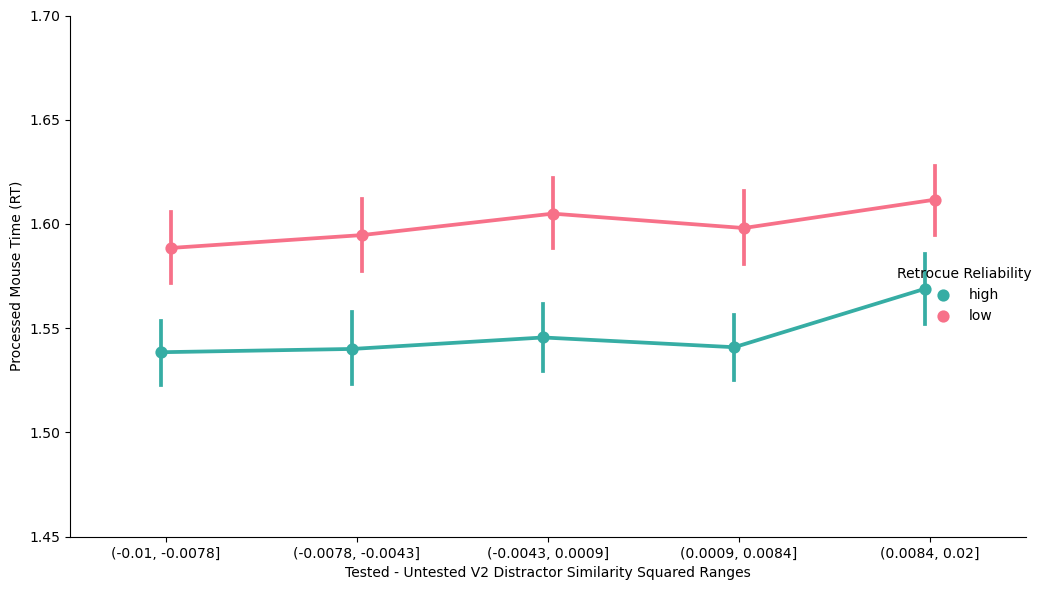

In [52]:
g = sns.catplot(x='Tested - Untested V2 Distractor Similarity Squared Ranges', y='analysis_rt', 
                hue='Retrocue Reliability', 
            kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
            palette = palette  # Reverse the color order
)
g.set(ylim=(1.45, 1.7))

plt.xlabel('Tested - Untested V2 Distractor Similarity Squared Ranges')
plt.ylabel('Processed Mouse Time (RT)')
# plt.title('Prioritized - Deprioritized V2 Distractor Similarity Squared Ranges')
plt.tight_layout()
plt.show()



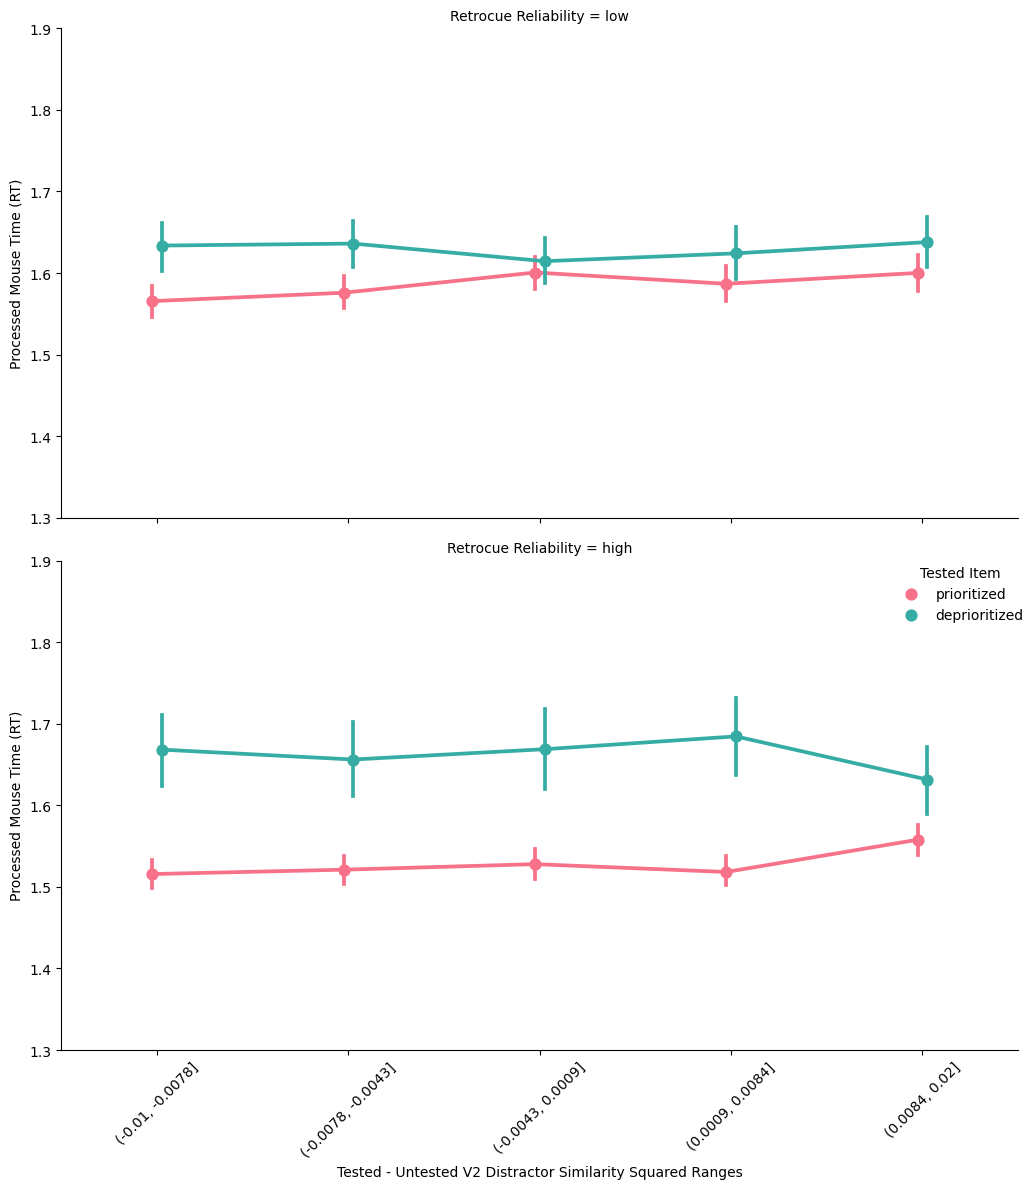

In [53]:
g = sns.catplot(
    x='Tested - Untested V2 Distractor Similarity Squared Ranges',
    y='analysis_rt',
    row='Retrocue Reliability',
    hue='Tested Item',  # Use 'row' instead of 'col'
    kind='point',
    row_order = ['low', 'high'], 
    data=df_correct,
    dodge=True,
    height=6,
    aspect=1.5,
    palette=palette[::-1]  # Use the reversed color order
)
g.set(ylim=(1.3, 1.9))

# Rotate the x-axis labels
for ax in g.axes.flat:
    ax.set_xlabel('Tested - Untested V2 Distractor Similarity Squared Ranges')
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Set the y-axis label for all plots
g.set_axis_labels('Tested - Untested V2 Distractor Similarity Squared Ranges', 'Processed Mouse Time (RT)')

plt.tight_layout()
plt.show()



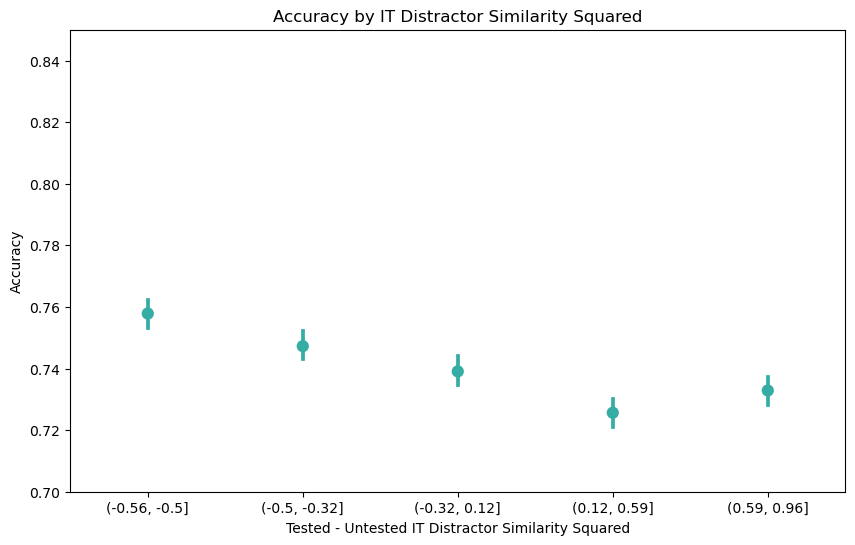

In [54]:
plt.figure(figsize=(10, 6))
sns.pointplot(
    x='IT_diff_binned_test_sq',
    y='Accuracy',
    errorbar=('ci', 68),  # Updated error bar parameter
    dodge=0.5,
    palette=single_color_palette,  # Use the single-color palette
    data=df
)
plt.ylim(0.7, 0.85)
plt.ylabel('Accuracy')
plt.xlabel('Tested - Untested IT Distractor Similarity Squared')
plt.title('Accuracy by IT Distractor Similarity Squared')
plt.show()


/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_56471/492118580.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(44.99652777777777, 0.5, 'Accuracy')

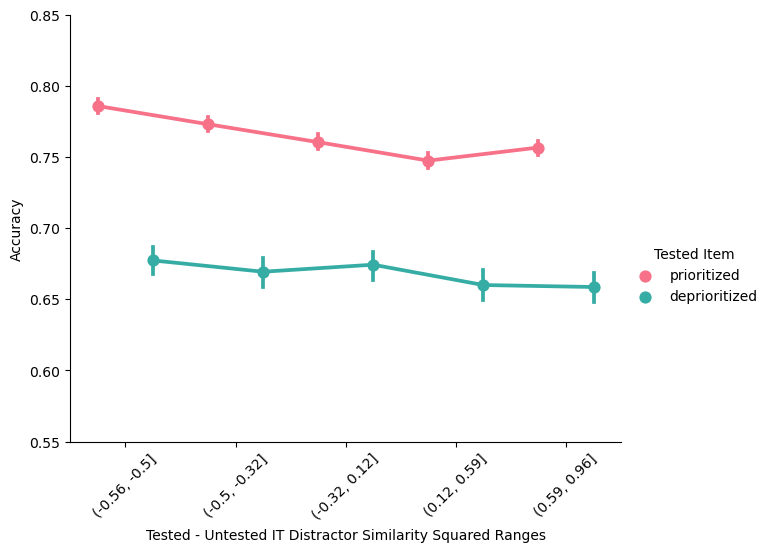

In [55]:


g = sns.catplot(
            x = 'Tested - Untested IT Distractor Similarity Squared Ranges',
            y = 'Accuracy',
            ci = 68,
            hue = 'Tested Item',
            # col = 'Retrocue Reliability',
            aspect = 1.3,
            dodge = 0.5,
            kind = 'point',
            
            palette = sns.color_palette("husl", n_colors=2),  # Reverse the color order
            data = df)
g.set(ylim=(0.55, 0.85))
plt.xticks(rotation=45)

plt.ylabel('Accuracy')



/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_56471/1508938989.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


Text(45.877985517568845, 0.5, 'Accuracy')

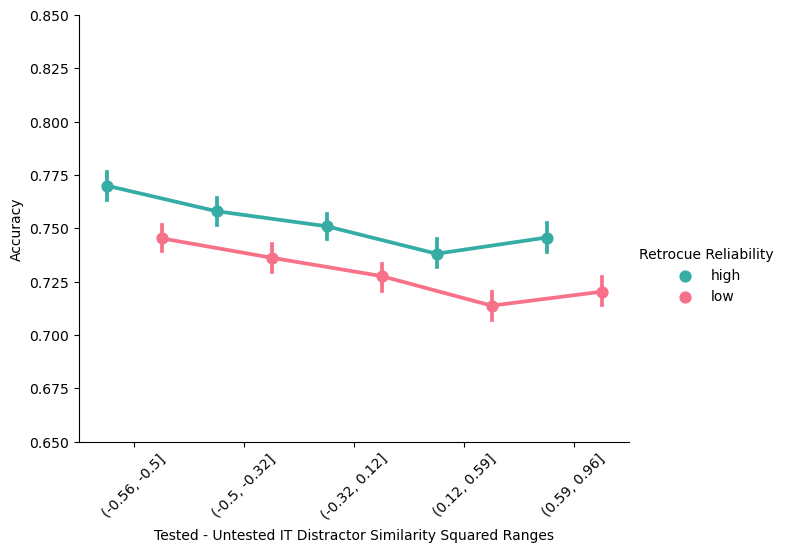

In [56]:

g = sns.catplot(
            x = 'Tested - Untested IT Distractor Similarity Squared Ranges',
            y = 'Accuracy',
            ci = 68,
            hue = 'Retrocue Reliability',
            # col = 'Retrocue Reliability',
            aspect = 1.3,
            dodge = 0.5,
            kind = 'point',
            
            palette = palette,  # Reverse the color order
            data = df)
g.set(ylim=(0.65, 0.85))
plt.xticks(rotation=45)

plt.ylabel('Accuracy')



/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_56471/3566317007.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 68)` for the same effect.

  g = sns.catplot(


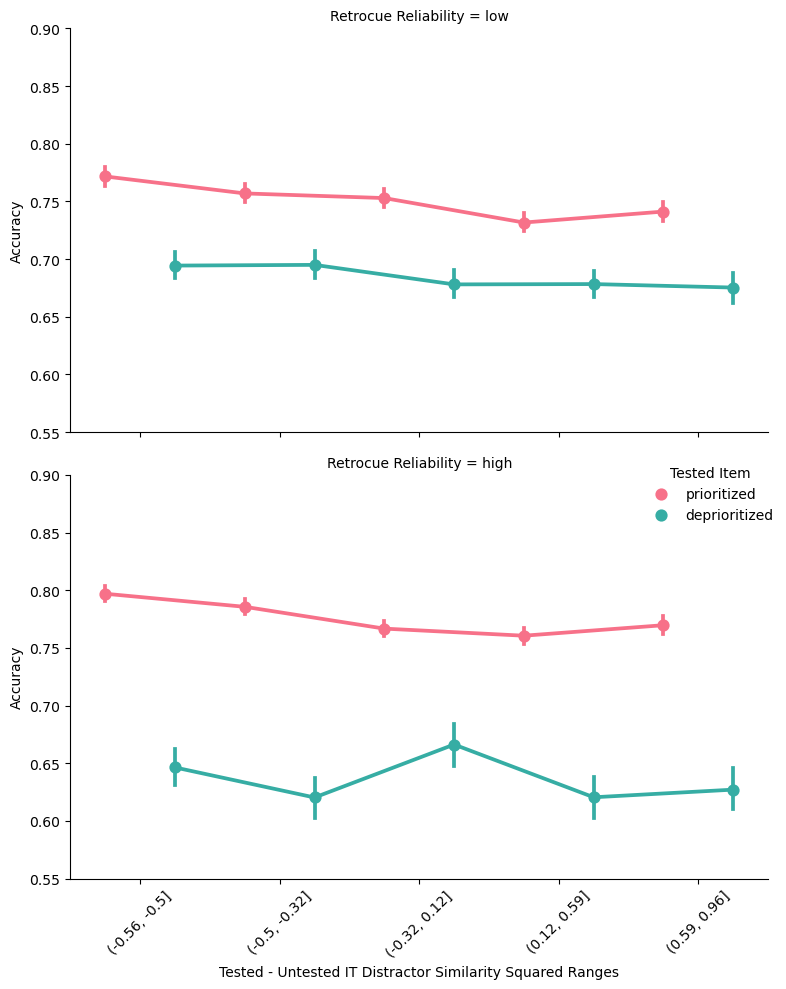

In [57]:

g = sns.catplot(
    x='Tested - Untested IT Distractor Similarity Squared Ranges',
    y='Accuracy',
    ci=68,
    hue='Tested Item',
    row='Retrocue Reliability',  # Use 'row' instead of 'col'
    aspect=1.3,
    row_order = ['low', 'high'],
    dodge=0.5,
    kind='point',
    palette=palette[::-1],  # Use the reversed color order
    data=df
)
g.set(ylim=(0.55, 0.9))

# Rotate the x-axis labels
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

g.set_axis_labels("Tested - Untested IT Distractor Similarity Squared Ranges", "Accuracy")
plt.tight_layout()
plt.show()

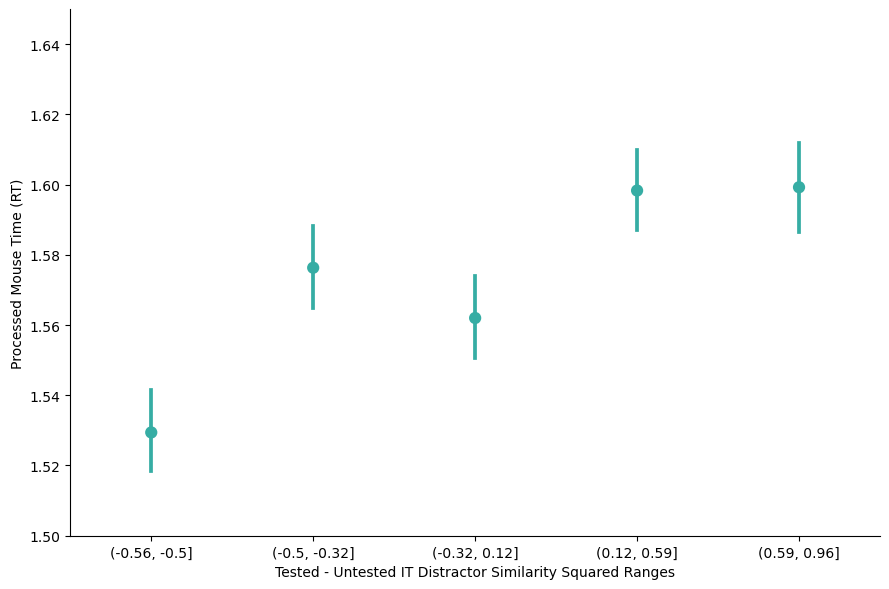

In [58]:
g = sns.catplot(x='Tested - Untested IT Distractor Similarity Squared Ranges', y='analysis_rt', 
#                 hue='Tested Item', 
            kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
            # order=['Least Similar', ' ', ' ', ' ', 'Most Similar'],  # Specify the order of the categories
            palette = single_color_palette  # Reverse the color order
)
g.set(ylim=(1.5, 1.65))

plt.xlabel('Tested - Untested IT Distractor Similarity Squared Ranges')
plt.ylabel('Processed Mouse Time (RT)')
# plt.title('Processed Mouse Time (RT) vs V2 Distractor Similarity\nSquared Ranges')
plt.tight_layout()
plt.show()


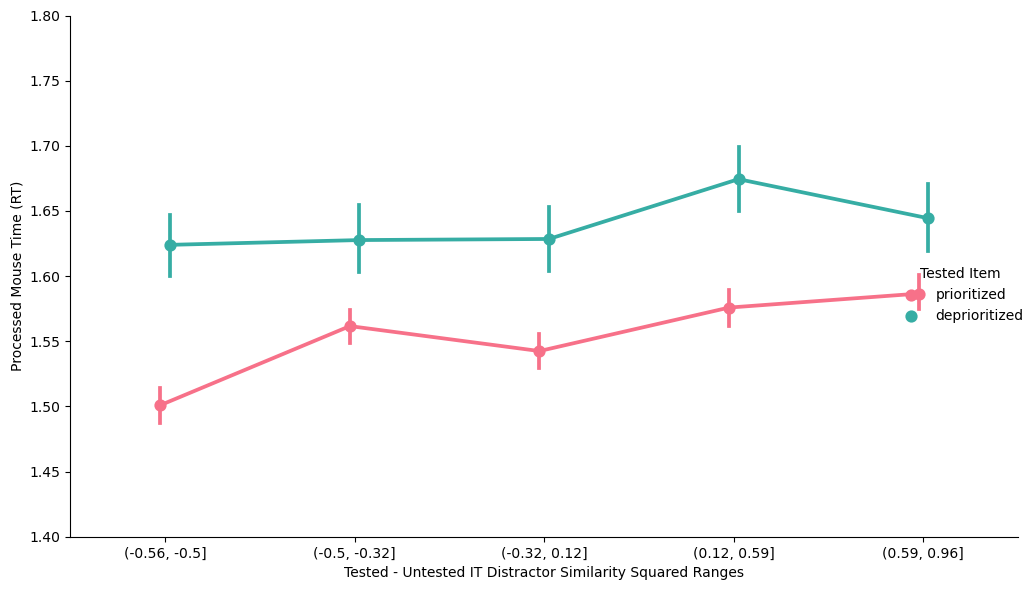

In [59]:

g = sns.catplot(x='Tested - Untested IT Distractor Similarity Squared Ranges', y='analysis_rt', 
                hue='Tested Item', 
            kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
            palette = palette[::-1]  # Reverse the color order
)
g.set(ylim=(1.4, 1.8))

plt.xlabel('Tested - Untested IT Distractor Similarity Squared Ranges')
plt.ylabel('Processed Mouse Time (RT)')
# plt.title('Processed Mouse Time (RT) vs V2 Distractor Similarity\nto Prioritized Item')
plt.tight_layout()
plt.show()



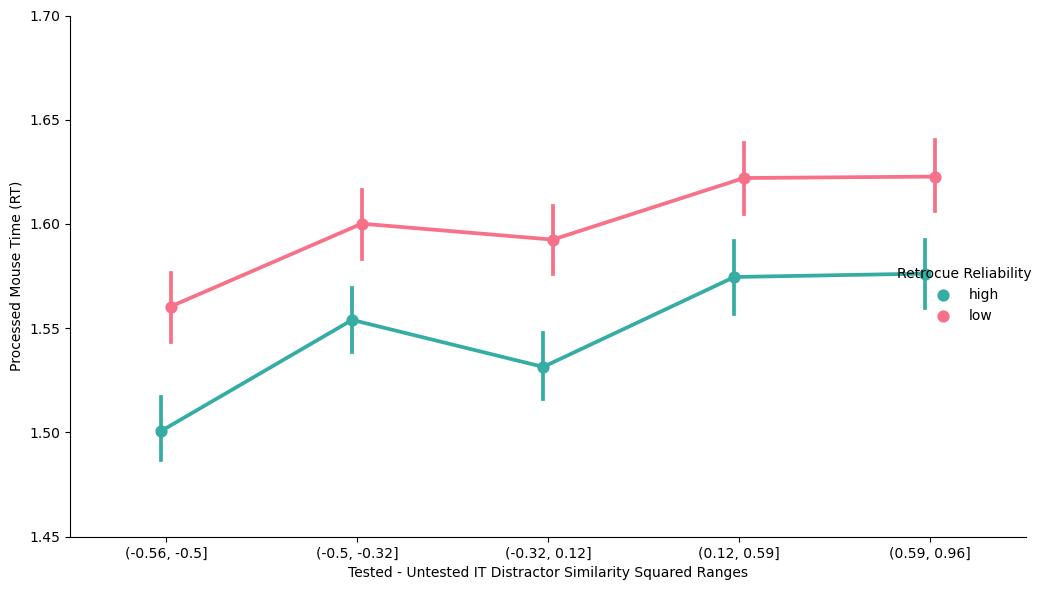

In [60]:

g = sns.catplot(x='Tested - Untested IT Distractor Similarity Squared Ranges', y='analysis_rt', 
                hue='Retrocue Reliability', 
            kind='point', data=df_correct, dodge=True, height=6, aspect=1.5, 
            palette = palette  # Reverse the color order
)
g.set(ylim=(1.45, 1.7))

plt.xlabel('Tested - Untested IT Distractor Similarity Squared Ranges')
plt.ylabel('Processed Mouse Time (RT)')
# plt.title('Prioritized - Deprioritized V2 Distractor Similarity Squared Ranges')
plt.tight_layout()
plt.show()



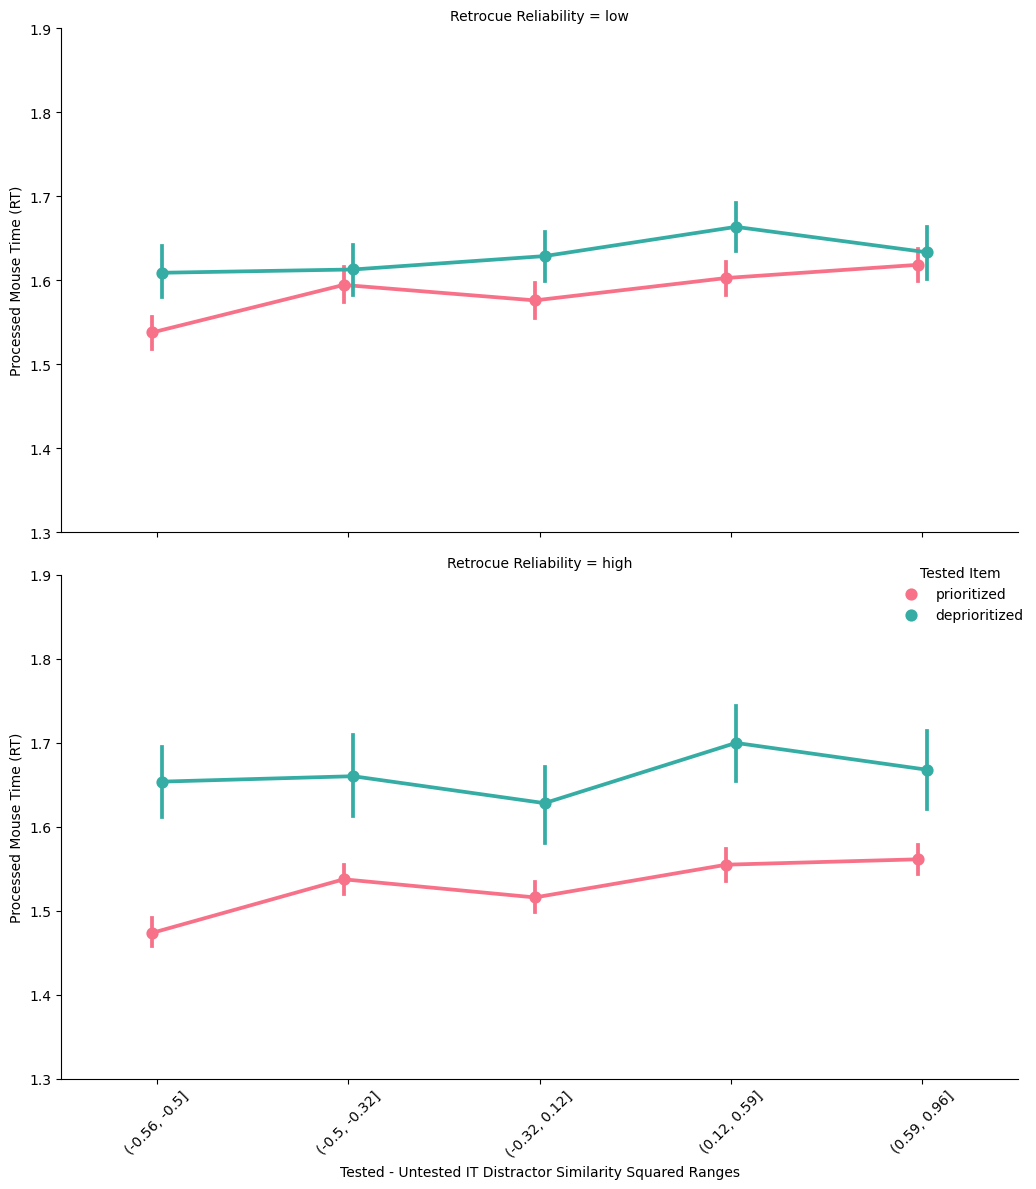

In [61]:
g = sns.catplot(
    x='Tested - Untested IT Distractor Similarity Squared Ranges',
    y='analysis_rt',
    row='Retrocue Reliability',
    hue='Tested Item',  # Use 'row' instead of 'col'
    kind='point',
    row_order = ['low', 'high'],
    data=df_correct,
    dodge=True,
    height=6,
    aspect=1.5,
    palette=palette[::-1]  # Use the reversed color order
)
g.set(ylim=(1.3, 1.9))

# Rotate the x-axis labels
for ax in g.axes.flat:
    ax.set_xlabel('Tested - Untested IT Distractor Similarity Squared Ranges')
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Set the y-axis label for all plots
g.set_axis_labels('Tested - Untested IT Distractor Similarity Squared Ranges', 'Processed Mouse Time (RT)')

plt.tight_layout()
plt.show()


In [62]:
len(set(df['participant']))

137

In [63]:
### instead of Prioritized-Deprioritized similarity on x axis, get (both relative and absolute)
# Similarity to Tested item and then split by prioritzed - x axis will be relative to tested/untested instead of prioritized/deprioritized